# Getting Started

The purpose of the present `Getting Started` section is to give a quick overview of the main objects, methods and functions of the Python `iode` library.
To get a more detailed presentation of all capabilities of `iode`, read the next sections of the tutorial.

The [Installation](../install.rst#installation) section describes how to install the `iode` library and the `iode-gui` graphical user interface and their dependencies.

The [Introduction](../introduction.rst#introduction) section gives a brief overview of the concepts of the `IODE` tool.
    
The [The LEC Language](../lec_language.rst#the-lec-language) section describes the *LEC* language ("*Langage Econométrique Condensé*"), which is the scripting language used in the `IODE` tool to define *equations*, *identities* or any mathematical expressions to be evaluated.

The [API Reference](../api.rst#api-reference) section of the documentation give you the list of all objects, methods and functions with their individual documentation and examples.

The [Equivalence IODE Report Commands and IODE Python](../equivalence.rst#equivalence-iode-report-commands-and-iode-python) section contains *equivalence tables* between the IODE report syntax and the Python `iode` syntax.

To use the Python `iode` library, the first thing to do is to import objects and functions you need from it:

In [1]:
import numpy as np
import pandas as pd
import larray as la

from iode import Sample_DATA_DIR, NA

To know the version of the `iode` library installed on your machine, type:

In [2]:
from iode import __version__
__version__

'7.1.0'

To print the documentation of an object, method or function in a Python interactive console, use the `help()` function:

In [3]:
from iode import equations

# ---- print documentation of a function or method ----
help(equations.load)

Help on method load in module iode.iode_database.abstract_database:

load(filepath: str) method of iode.iode_database.equations_database.Equations instance
    Load objects stored in file 'filepath' into the current database.
    Erase the database before to load the file.

    Parameters
    ----------
    filepath: str
        path to the file to load

    Examples
    --------
    >>> from iode import comments, equations, identities, lists, tables, scalars, variables
    >>> from iode import Sample_DATA_DIR
    >>> comments.load(f"{Sample_DATA_DIR}/fun.cmt")         # doctest: +ELLIPSIS, +NORMALIZE_WHITESPACE
    Loading .../fun.cmt
    317 objects loaded

    >>> equations.load(f"{Sample_DATA_DIR}/fun.eqs")        # doctest: +ELLIPSIS, +NORMALIZE_WHITESPACE
    Loading .../fun.eqs
    274 objects loaded

    >>> identities.load(f"{Sample_DATA_DIR}/fun.idt")       # doctest: +ELLIPSIS, +NORMALIZE_WHITESPACE
    Loading .../fun.idt
    48 objects loaded

    >>> lists.load(f"{Sample_

## IODE Objects

A model is a system of *equations*, which are formulas involving *variables*, numerical time series defined over a given period, with a specific frequency (annual, quarterly, etc.). 
The *equations* may contain coefficients (possibly estimated) which are dimensionless *variables*, called *Scalars*.

The *variables* themselves are not always obtained as such, but most often result from calculations based on other *variables*, possibly coming from several sources. These calculations can be, for example, sector aggregation or a geographic dimension. The formulas used to generate those *variables* are called *identities*.

The name given to each *variable* generally does not allow its content to be indicated with sufficient precision. IODE allows the creation of *comments* whose name will be identical to that of the *variables* they define. These *comments* are simply free text.

When *variables* are available, it is often useful to present them in the form of tables or charts. 
IODE allows the construction of special *tables* for this purpose. Those *tables* do not contain numerical values, but formulas and text. Then, these can be "*computed*" so as to obtain numerical tables (called *computed tables*) or charts. This approach is very efficient: the same table can be reused to print different versions of the *variables* (after simulating a scenario, for example). These *tables* can also be used to compare different scenarios or variants of a model by loading different files containing the same *variables*.

There is no notion of a model as an object in IODE: a model is simply a *list* of equations. 
To avoid the tedious work of re-encoding *lists*, these are managed as standalone objects and saved in list files. *Lists* are also used in formulas to shorten writing, or passed as parameters to *IODE functions*, etc.

Each object of one of the seven types is identified by a name of up to 20 characters. They always start with a letter or an underscore '_'. Their names are written in lowercase for *scalars* and in uppercase for other objects (so as to distinguish *scalars* and *variables* in *LEC* formulas).

### Comment

IODE *Comments* are free text. They are used to document other IODE objects.

In [4]:
cmt_ACAF = "Enterprises: received capital transfers"
cmt_ACAF

'Enterprises: received capital transfers'

### Equation

An *equation* represents an equality mixing *variables* and *scalars* (coefficients) and is part of a model. 
Each equation is composed of the following elements:

- the *LEC* form (the formula scripting language in IODE)
- a free comment (title of the Table)
- the method by which it was estimated (if applicable)
- the possible estimation period
- the names of equations estimated simultaneously (block)
- the instruments used for the estimation

All these definition elements are present in each equation, but may be left empty if not applicable.

The name of an equation is that of its endogenous variable. An equation can never be renamed, 
but it can be deleted and redefined with a new name.

To create an equation, you can use the constructor method of the [Equation](../_generated/iode.Equation.rst#iode.Equation) class:

In [5]:
# ---- hidden cell -> required to run the estimation of the equation below ----
from iode import comments, equations, identities, lists, scalars, tables, variables

comments.load(f"{Sample_DATA_DIR}/fun.cmt")
equations.load(f"{Sample_DATA_DIR}/fun.eqs")
identities.load(f"{Sample_DATA_DIR}/fun.idt")
lists.load(f"{Sample_DATA_DIR}/fun.lst")
scalars.load(f"{Sample_DATA_DIR}/fun.scl")
tables.load(f"{Sample_DATA_DIR}/fun.tbl")
variables.load(f"{Sample_DATA_DIR}/fun.var")

Loading C:\soft\miniconda3\Lib\site-packages\iode\tests\data/fun.cmt
317 objects loaded
Loading C:\soft\miniconda3\Lib\site-packages\iode\tests\data/fun.eqs
274 objects loaded
Loading C:\soft\miniconda3\Lib\site-packages\iode\tests\data/fun.idt
48 objects loaded
Loading C:\soft\miniconda3\Lib\site-packages\iode\tests\data/fun.lst
17 objects loaded
Loading C:\soft\miniconda3\Lib\site-packages\iode\tests\data/fun.scl
161 objects loaded
Loading C:\soft\miniconda3\Lib\site-packages\iode\tests\data/fun.tbl
46 objects loaded
Loading C:\soft\miniconda3\Lib\site-packages\iode\tests\data/fun.var
394 objects loaded


In [6]:
from iode import Equation, variables
# initialize the sample (range of periods) of the 'variables' workspace
variables.sample = "1960Y1:2015Y1"
# create a new equation
eq_ACAF = Equation("ACAF", "(ACAF / VAF[-1]) := acaf1 + acaf2 * GOSF[-1] + acaf4 * (TIME=1995)")
eq_ACAF

Equation(endogenous = 'ACAF',
         lec = '(ACAF / VAF[-1]) := acaf1 + acaf2 * GOSF[-1] + acaf4 * (TIME=1995)',
         method = 'LSQ',
         from_period = '1960Y1',
         to_period = '2015Y1')

To access and modify the elements of an equation, you can use the following attributes:

In [7]:
# endogenous variables of the equation 
# (= equation's name)
eq_ACAF.endogenous

'ACAF'

<div class="alert alert-warning">

**Warning**: the *endogenous* variable of an equation is the name of the equation itself and cannot be changed:

</div>

In [8]:
try:
    eq_ACAF.endogenous = "ACAF_"
except AttributeError as e:
    print(f"Error: {e}")

Error: property 'endogenous' of 'Equation' object has no setter


In [9]:
# LEC form of the equation
eq_ACAF.lec

'(ACAF / VAF[-1]) := acaf1 + acaf2 * GOSF[-1] + acaf4 * (TIME=1995)'

In [10]:
eq_ACAF.lec = "ACAF / VAF[-1] := acaf1 + acaf2 * GOSF[-1] + acaf4 * (TIME=1995)"
eq_ACAF.lec

'ACAF / VAF[-1] := acaf1 + acaf2 * GOSF[-1] + acaf4 * (TIME=1995)'

In [11]:
# estimation method of the equation
eq_ACAF.method

'LSQ'

In [12]:
from iode import EqMethod
eq_ACAF.method = EqMethod.MAX_LIKELIHOOD
eq_ACAF.method

'MAX_LIKELIHOOD'

In [13]:
# range of periods for which the equation is estimated
# By default, it is the sample of the 'variables' workspace
eq_ACAF.sample

Sample("1960Y1:2015Y1")

In [14]:
eq_ACAF.sample = "1980Y1:1996Y1"
eq_ACAF.sample

Sample("1980Y1:1996Y1")

In [15]:
# block of equations to which the equation belongs
# A block of equations is a group of equations that are estimated together
eq_ACAF.block

''

In [16]:
eq_ACAF.block = "ACAF;DPUH"
eq_ACAF.block

'ACAF;DPUH'

In [17]:
# comment associated with the equation
eq_ACAF.comment

''

In [18]:
eq_ACAF.comment = cmt_ACAF
eq_ACAF.comment

'Enterprises: received capital transfers'

In [19]:
# instruments associated with the equation
eq_ACAF.instruments

''

In [20]:
eq_ACAF.instruments = ["GOSF", "VAF"]
eq_ACAF.instruments

['GOSF', 'VAF']

In [21]:
# tests evaluated during the estimation of the equation
eq_ACAF.tests

{'corr': 0.0,
 'dw': 0.0,
 'fstat': 0.0,
 'loglik': 0.0,
 'meany': 0.0,
 'r2': 0.0,
 'r2adj': 0.0,
 'ssres': 0.0,
 'stderr': 0.0,
 'stderrp': 0.0,
 'stdev': 0.0}

<div class="alert alert-warning">

**Warning**: the *tests* associated with an equation are set during the estimation process and cannot be modified manually.

</div>

In [22]:
try:
    eq_ACAF.tests = [1.0, 2.32935, 32.2732, 83.8075, 0.00818467, 0.821761, 0.796299,
                     5.19945e-05, 0.00192715, 23.5458, 0.0042699]
except AttributeError as e:
    print(f"Error: {e}")

Error: property 'tests' of 'Equation' object has no setter


<div class="alert alert-warning">

**Warning**: in the same way, the *date* attribute of an equation is updated during the estimation process and cannot be modified manually.

</div>

In [23]:
# last date of estimation of the equation
eq_ACAF.date

''

In [24]:
try:
    eq_ACAF.date = "04-06-2025"
except AttributeError as e:
    print(f"Error: {e}")

Error: property 'date' of 'Equation' object has no setter


To get the list of *scalars* (*coefficients*) and *variables* referenced in an Equation, use the [coefficients](../_generated/iode.Equation.coefficients.rst#iode.Equation.coefficients) and [variables](../_generated/iode.Equation.variables.rst#iode.Equation.variables) properties of the [Equation](../_generated/iode.Equation.rst#iode.Equation) class:

In [25]:
eq_ACAF.coefficients

['acaf1', 'acaf2', 'acaf4']

In [26]:
eq_ACAF.variables

['ACAF', 'VAF', 'GOSF', 'TIME']

To split an equation into its left-hand side and its right-hand side, use the [split_equation](../_generated/iode.Equation.split_equation.rst#iode.Equation.split_equation) method of the [Equation](../_generated/iode.Equation.rst#iode.Equation) class:

In [27]:
left, right = eq_ACAF.split_equation()
print("left-hand side: ", left)
print("right-hand side:", right)

left-hand side:  ACAF / VAF[-1]
right-hand side: acaf1 + acaf2 * GOSF[-1] + acaf4 * (TIME=1995)


To estimate the an equation, use the [estimate](../_generated/iode.Equation.estimate.rst#iode.Equation.estimate) method of the [Equation](../_generated/iode.Equation.rst#iode.Equation) class.

At the end of the estimation process, certain variables and scalars are automatically created if the process has converged. These variables and scalars can be used for computational purposes and, as they are part of the global workspace, can be saved for future use.

The tests resulting from the last estimation are saved as scalars. 
The same applies to residuals, left-hand and right-hand members of equations.

Saved tests (as scalars) have the following names:

- `e0_n` : number of sample periods 
- `e0_k` : number of estimated coefficients 
- `e0_stdev` : std dev of residuals 
- `e0_meany` : mean of Y 
- `e0_ssres` : sum of squares of residuals 
- `e0_stderr` : std error 
- `e0_stderrp` : std error percent (in %) 
- `e0_fstat` : F-Stat 
- `e0_r2` : R square 
- `e0_r2adj` : adjusted R-squared 
- `e0_dw` : Durbin-Watson 
- `e0_loglik` : Log Likelihood

Calculated series are saved in special variables:

- `_YCALC0` : right-hand side of the equation
- `_YOBS0` : left-hand side of the equation
- `_YRES0` : residuals of the equation

Outside the estimation sample, the series values are `NA` (Not Available):

In [28]:
success = eq_ACAF.estimate("1980Y1", "2000Y1")
success

Estimating : iteration 1 (||eps|| = 0.0566493)

Estimating : iteration 2 (||eps|| = 0.0594508)

Estimating : iteration 3 (||eps|| = 0.0117815)

Estimating : iteration 4 (||eps|| = 0.00240163)

Estimating : iteration 5 (||eps|| = 0.000492758)

Estimating : iteration 6 (||eps|| = 0.000101281)

Estimating : iteration 7 (||eps|| = 2.08105e-05)

Estimating : iteration 8 (||eps|| = 4.27624e-06)

Solution reached after 8 iteration(s). Creating results file ...



True

In [29]:
eq_ACAF.tests

{'corr': 1.0,
 'dw': 1.8939708471298218,
 'fstat': 34.6290397644043,
 'loglik': 158.13970947265625,
 'meany': 0.007528899237513542,
 'r2': 0.7937153577804565,
 'r2adj': 0.7707948684692383,
 'ssres': 7.38456001272425e-05,
 'stderr': 0.002025471068918705,
 'stderrp': 26.902618408203125,
 'stdev': 0.004230715800076723}

In [30]:
eq_ACAF.date

'06-06-2025'

### Identity

An *identity* is an expression written in the *LEC* language that allows the construction of a 
new statistical series based on already defined series. In general, *identities* are executed
in groups to create or update a set of *variables*. *Identities* can be executed for a specific 
range of periods, or for all periods defined in the workspace.

*Identities* should not be confused with *equations*. They are not part of a model.

To create an *identity*, you can use the constructor method of the [Identity](../_generated/iode.Identity.rst#iode.Identity) class:

In [31]:
from iode import Identity
idt = Identity("1 - exp((gamma2 + gamma3 * ln(W/ZJ)[-1] + gamma4 * ln(WMIN/ZJ)) / gamma_)")
idt

Identity('1 - exp((gamma2 + gamma3 * ln(W/ZJ)[-1] + gamma4 * ln(WMIN/ZJ)) / gamma_)')

To get the list of *scalars* (*coefficients*) and *variables* referenced in an identity, use the [coefficients](../_generated/iode.Identity.coefficients.rst#iode.Identity.coefficients) and [variables](../_generated/iode.Identity.variables.rst#iode.Identity.variables) properties of the [Identity](../_generated/iode.Identity.rst#iode.Identity) class:

In [32]:
idt.coefficients

['gamma2', 'gamma3', 'gamma4', 'gamma_']

In [33]:
idt.variables

['W', 'ZJ', 'WMIN']

### List

IODE *Lists* are either free text (like IODE *comments*) or a Python list. 
They are used to simplify writing in various circumstances:

- list of equations defining a model
- list of tables to print
- any argument of a function (such as print period)
- macro in an equation, identity, or table
- etc.

In [34]:
A_VARS = ["ACAF", "ACAG", "AOUC", "AOUC_", "AQC"]
A_VARS

['ACAF', 'ACAG', 'AOUC', 'AOUC_', 'AQC']

### Scalar

*Scalars* are essentially estimated coefficients of econometric *equations*. 
For this reason, each scalar contains in its definition:

- its *value*
- the *relaxation* parameter, set to 0 to lock the coefficient during estimation
- its *standard deviation*, result of the last estimation

Only the *values* of the *scalars* are relevant when calculating a *LEC* expression. 
The other two values (relaxation and standard deviation) are only meaningful for estimation.

The names of *scalars* must be in lowercase so that *variables* are distinct from *scalars* in *LEC* formulas.

To create a *scalar*, you can use the constructor method of the [Scalar](../_generated/iode.Scalar.rst#iode.Scalar) class:


In [35]:
import numpy as np
from iode import Scalar

# default relax
scalar = Scalar(0.9)
scalar

Scalar(0.9, 1, na)

In [36]:
# specific value and relax
scalar = Scalar(0.9, 0.8)
scalar

Scalar(0.9, 0.8, na)

In [37]:
# Python nan are converted to IODE NA
scalar = Scalar(np.nan)
scalar

Scalar(na, 1, na)

In [38]:
# Python inf are not accepted
try:
    scalar = Scalar(np.inf)
except ValueError as e:
    print(f"Error: {e}")

Error: Expected 'value' to be a finite number


In [39]:
# relax must be between 0.0 and 1.0
try:
    scalar = Scalar(0.9, 1.1)
except ValueError as e:
    print(f"Error: {e}")

Error: Expected 'relax' value between 0.0 and 1.0


To access and modify the *value* and *relax* of a *scalar*, use the following attributes:

In [40]:
scalar.value

nan

In [41]:
scalar.value = 0.95
scalar.value

0.95

In [42]:
scalar.relax

1.0

In [43]:
scalar.relax = 0.85
scalar.relax

0.85

To access *standard deviation* of a *scalar*, use the *std* attribute:

In [44]:
scalar.std

nan

<div class="alert alert-warning">

**Warning**: the *standard deviation* of a *scalar* is set during the estimation process and cannot be modified manually.

</div>

In [45]:
try:
    scalar.std = 0.001369
except AttributeError as e:
    print(f"Error: {e}")

Error: property 'std' of 'Scalar' object has no setter


### Table

One of the most frequently performed operations during a simulation exercise is the display of tables of results and charts. 

Each IODE *table* is a set of lines. A line is composed of two parts (in general):

- a *text* part, which will be the title of the line
- a *formula* part, which will allow the calculation of the numerical values to be placed in the *computed table*:

>
>    TABLE TITLE    
>       
>    Gross National Product      GNP    
>    Unemployment                UL    
>    External Balance            X-I
>

The lines are actually of several types: 

- *TITLE* lines (centered on the page width), 
- *CELL* lines (title + formula), 
- *SEPARATOR* lines
- *MODE* lines
- *FILES* lines
- *DATE* lines

A table is designed to be "*computed*" over different periods, described by a "*generalized sample*" 
such as:

>
>    1980Y1:10               --> 10 observations from 1980Y1
>    1980Y1, 1985Y1, 1990:5  --> 1980, 1985, then 5 observations from 1990Y1
>    80/79:5                 --> 5 growth rates from 1980
>    ...
>

It can also contain values from different files:

>
>    (1990:5)[1,2,1-2]   --> values from 1990 to 1994 for files
>                            1, 2, and for the difference between the two files.
>

The *computed table* can be:

- displayed on screen
- printed
- exported as a chart
- exported to a file (in CSV, HTML, ...)
- (Python) converted to a Pandas DataFrame or an larray Array

*Tables* can very well be used in a project that does not include an econometric model: 
the only information used by tables are *variables* and possibly *scalars*.

#### Create A Table

To create an IODE table, you can either: 

1. Call the [Table](../_generated/iode.Table.rst#iode.Table) constructor without any argument. This will create an empty table with two columns. Then you can add lines using the [+= operator](../_generated/iode.Table.__iadd__.rst) or the [insert()](../_generated/iode.Table.insert.rst#iode.Table.insert) method (see next section).

In [46]:
from iode import Table

# empty table
table = Table()
table

DIVIS | 1 |     
TITLE |         
----- | --------
CELL  |   | "#S"
----- | --------

nb lines: 4
nb columns: 2
language: 'ENGLISH'
gridx: 'MAJOR'
gridy: 'MAJOR'
graph_axis: 'VALUES'
graph_alignment: 'LEFT'

2. Call the [Table](../_generated/iode.Table.rst#iode.Table) constructor with a title and a list of variables. This list can contain IODE list(s) referenced with a `$` symbol. In that case, the IODE list(s) will be expanded to its (their) content. For each row, if an IODE comment with the same name as the variable exists, the value of the comment will be used in the left column. If the comment does not exist, the name of the variable will be used. The boolean arguments *mode*, *files* and *date* can be used to append the corresponding special lines to the table. These three lines are used when the table is computed (according to a *generalized sample*):

In [47]:
# content of the IODE list 'ENVI'
lists["ENVI"]

['EX',
 'PWMAB',
 'PWMS',
 'PWXAB',
 'PWXS',
 'QWXAB',
 'QWXS',
 'POIL',
 'NATY',
 'TFPFHP_']

In [48]:
# create a table using a list of variables
# NOTE: the list of variables can contain IODE list(s). 
#       The IODE list(s) must be referenced using the '$' symbol
table_title = "Table example with variables only"
lines_vars = ["GOSG", "YDTG", "DTH", "DTF", "IT", "YSSG", "COTRES", "RIDG", "OCUG", "$ENVI"]
table = Table(2, table_title, lines_vars, mode=True, files=True, date=True)
table

DIVIS | 1                                                                    |        
TITLE |                      "Table example with variables only"                      
----- | ------------------------------------------------------------------------------
CELL  |                                                                      |   "#S" 
----- | ------------------------------------------------------------------------------
CELL  | "Bruto exploitatie-overschot: overheid (= afschrijvingen)."          |    GOSG
CELL  | "Overheid: geïnde indirecte belastingen."                            |    YDTG
CELL  | "Totale overheid: directe belasting van de gezinnen."                |     DTH
CELL  | "Totale overheid: directe vennootschapsbelasting."                   |     DTF
CELL  | "Totale indirecte belastingen."                                      |      IT
CELL  | "Globale overheid: ontvangen sociale zekerheidsbijdragen."           |    YSSG
CELL  | "Cotisation de responsabilisation."

In [49]:
# variables or LEC expressions can be also passed as a single string
lines_vars = "GOSG;YDTG;DTH;DTF;IT;YSSG;COTRES;RIDG;OCUG;$ENVI"
table_title = "Table example with all variables passed as a single string"
table = Table(2, table_title, lines_vars, mode=True, files=True, date=True)
table

DIVIS | 1                                                                    |        
TITLE |          "Table example with all variables passed as a single string"         
----- | ------------------------------------------------------------------------------
CELL  |                                                                      |   "#S" 
----- | ------------------------------------------------------------------------------
CELL  | "Bruto exploitatie-overschot: overheid (= afschrijvingen)."          |    GOSG
CELL  | "Overheid: geïnde indirecte belastingen."                            |    YDTG
CELL  | "Totale overheid: directe belasting van de gezinnen."                |     DTH
CELL  | "Totale overheid: directe vennootschapsbelasting."                   |     DTF
CELL  | "Totale indirecte belastingen."                                      |      IT
CELL  | "Globale overheid: ontvangen sociale zekerheidsbijdragen."           |    YSSG
CELL  | "Cotisation de responsabilisation."

3. Call the [Table](../_generated/iode.Table.rst#iode.Table) constructor with a title, a list of line titles (left column) and a list of the variables names or LEC expressions (right column):

In [50]:
table_title = "Table example with titles on the left and LEC expressions on the right"
# left column
lines_titles = ["GOSG:", "YDTG:", "DTH:", "DTF:", "IT:", "YSSG+COTRES:", "RIDG:", "OCUG:"]
# right column
lines_lecs = ["GOSG", "YDTG", "DTH", "DTF", "IT", "YSSG+COTRES", "RIDG", "OCUG"]
table = Table(2, table_title, lines_lecs, lines_titles, True, True, True)
table

DIVIS | 1              |            
TITLE | "Table example with titles on the left and LEC expressions on the right"
----- | ------------------------------------------------------------------------
CELL  |                |     "#S"   
----- | ------------------------------------------------------------------------
CELL  | "GOSG:"        |        GOSG
CELL  | "YDTG:"        |        YDTG
CELL  | "DTH:"         |         DTH
CELL  | "DTF:"         |         DTF
CELL  | "IT:"          |          IT
CELL  | "YSSG+COTRES:" | YSSG+COTRES
CELL  | "RIDG:"        |        RIDG
CELL  | "OCUG:"        |        OCUG
----- | ------------------------------------------------------------------------
MODE  | 
FILES | 
DATE  | 

nb lines: 16
nb columns: 2
language: 'ENGLISH'
gridx: 'MAJOR'
gridy: 'MAJOR'
graph_axis: 'VALUES'
graph_alignment: 'LEFT'

#### Get/Update The Divider Line

To update the divider line, use the [divider](../_generated/iode.Table.divider.rst#iode.Table.divider) attribute:

In [51]:
# the default divider is 1
table.divider

('1', '')

In [52]:
# update the divider to multiply all values of the 
# right column by 100 (e.g. to get percentage values)
table.divider = ('1', '1e-2')
table.divider

('1', '1e-2')

#### Find The Position Of A Line

To find the position of a line in an IODE table, use the [index(str)](../_generated/iode.Table.index.rst#iode.Table.index) method:

In [53]:
# find the index of the TITLE or CELL line containing RIDG
index = table.index("RIDG")
index

10

#### Get/Update Content Of Lines

To get or update the content of a line, use the [[index]](../_generated/iode.Table.__setitem__.rst) operator:

In [54]:
table[4]

('"GOSG:"', 'GOSG')

Negative indices can be used to get or update the content of a line from the end of the table:

In [55]:
# content of the last line
table[-1]

<DATE>

#### Append Lines

To append a line to an IODE table, use the [+= operator](../_generated/iode.Table.__iadd__.rst):

In [56]:
from iode import TableLineType

table = Table()

# append a title line
table += "Dummy Table"

# append a separator line
table += '-'

# append a line with cells
# NOTE: line containing double quotes " -> assumed to be a STRING cell
#       line without double quotes      -> assumed to be a LEC cell
table += ('"RIDG:"', 'RIDG')

# append a separator line (other way to do it)
table += TableLineType.SEP

# append a special MODE line
table += TableLineType.MODE

# append a special FILES line
table += TableLineType.FILES

# append a special DATE line
table += TableLineType.DATE

table

DIVIS | 1       |     
TITLE |               
----- | --------------
CELL  |         | "#S"
----- | --------------
TITLE | "Dummy Table" 
----- | --------------
CELL  | "RIDG:" | RIDG
----- | --------------
MODE  | 
FILES | 
DATE  | 

nb lines: 11
nb columns: 2
language: 'ENGLISH'
gridx: 'MAJOR'
gridy: 'MAJOR'
graph_axis: 'VALUES'
graph_alignment: 'LEFT'

#### Insert Lines

To insert a line at a specific index, use the [insert(index, value)](../_generated/iode.Table.insert.rst#iode.Table.insert) method:

In [57]:
# insert a CELL line before the RIDG line
index = table.index("RIDG")
table.insert(index, ('"OCUG:"', 'OCUG'))

# insert a CELL line after the RIDG line
index = table.index("RIDG")
table.insert(index + 1, ('"GOSG:"', 'GOSG'))

# insert a separator after the GOSG line
index = table.index("GOSG")
index += 1
table.insert(index, '-')

# insert a title line after the separator line
index += 1
table.insert(index, "New Title")

# insert a separator line after the title line
index += 1
table.insert(index, TableLineType.SEP)

table

DIVIS | 1       |     
TITLE |               
----- | --------------
CELL  |         | "#S"
----- | --------------
TITLE | "Dummy Table" 
----- | --------------
CELL  | "OCUG:" | OCUG
CELL  | "RIDG:" | RIDG
CELL  | "GOSG:" | GOSG
----- | --------------
TITLE |  "New Title"  
----- | --------------
----- | --------------
MODE  | 
FILES | 
DATE  | 

nb lines: 16
nb columns: 2
language: 'ENGLISH'
gridx: 'MAJOR'
gridy: 'MAJOR'
graph_axis: 'VALUES'
graph_alignment: 'LEFT'

#### Delete Lines

To delete a line, use the [del keyword](../_generated/iode.Table.__delitem__.rst):

In [58]:
index = table.index("New Title")

# delete the title line
del table[index]

table

DIVIS | 1       |     
TITLE |               
----- | --------------
CELL  |         | "#S"
----- | --------------
TITLE | "Dummy Table" 
----- | --------------
CELL  | "OCUG:" | OCUG
CELL  | "RIDG:" | RIDG
CELL  | "GOSG:" | GOSG
----- | --------------
----- | --------------
----- | --------------
MODE  | 
FILES | 
DATE  | 

nb lines: 15
nb columns: 2
language: 'ENGLISH'
gridx: 'MAJOR'
gridy: 'MAJOR'
graph_axis: 'VALUES'
graph_alignment: 'LEFT'

Negative indices can be used to delete lines from the end of the table:

In [59]:
# delete the last line
del table[-1]

table

DIVIS | 1       |     
TITLE |               
----- | --------------
CELL  |         | "#S"
----- | --------------
TITLE | "Dummy Table" 
----- | --------------
CELL  | "OCUG:" | OCUG
CELL  | "RIDG:" | RIDG
CELL  | "GOSG:" | GOSG
----- | --------------
----- | --------------
----- | --------------
MODE  | 
FILES | 

nb lines: 14
nb columns: 2
language: 'ENGLISH'
gridx: 'MAJOR'
gridy: 'MAJOR'
graph_axis: 'VALUES'
graph_alignment: 'LEFT'

#### Get the coefficients and variables of a table

To get the list of *scalars* (*coefficients*) and *variables* referenced in a *table*, use the [coefficients](../_generated/iode.Table.coefficients.rst#iode.Table.coefficients) and [variables](../_generated/iode.Table.variables.rst#iode.Table.variables) properties of the [Table](../_generated/iode.Table.rst#iode.Table) class:

In [60]:
table.coefficients

[]

In [61]:
table.variables

['GOSG', 'OCUG', 'RIDG']

#### Plotting

To plot a *table*, use the [plot](../_generated/iode.Table.plot.rst#iode.Table.plot) method:

In [62]:
# variables or LEC expressions can be also passed as a single string
table_title = "Table for plotting"
# left column
lines_titles = ["GOSG", "YDTG", "DTH", "DTF", "IT", "YSSG+COTRES", "RIDG", "OCUG"]
# right column
lines_lecs = ["GOSG", "YDTG", "DTH", "DTF", "IT", "YSSG+COTRES", "RIDG", "OCUG"]
table = Table(2, table_title, lines_lecs, lines_titles, True, True, True)
table

DIVIS | 1             |            
TITLE |     "Table for plotting"   
----- | ---------------------------
CELL  |               |     "#S"   
----- | ---------------------------
CELL  | "GOSG"        |        GOSG
CELL  | "YDTG"        |        YDTG
CELL  | "DTH"         |         DTH
CELL  | "DTF"         |         DTF
CELL  | "IT"          |          IT
CELL  | "YSSG+COTRES" | YSSG+COTRES
CELL  | "RIDG"        |        RIDG
CELL  | "OCUG"        |        OCUG
----- | ---------------------------
MODE  | 
FILES | 
DATE  | 

nb lines: 16
nb columns: 2
language: 'ENGLISH'
gridx: 'MAJOR'
gridy: 'MAJOR'
graph_axis: 'VALUES'
graph_alignment: 'LEFT'

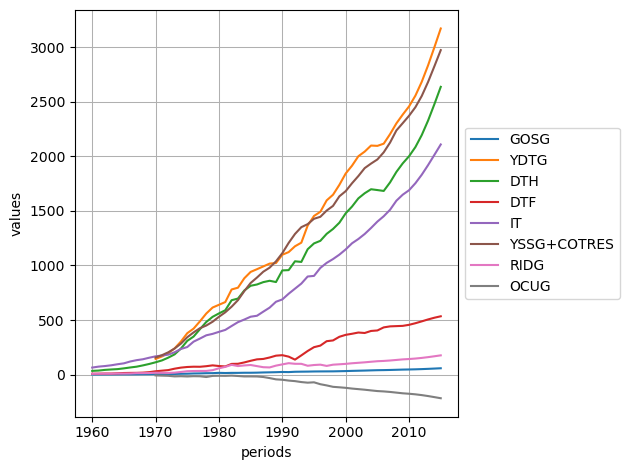

<Axes: xlabel='periods', ylabel='values'>

In [63]:
table.plot()

### Variable

*Variables* are series of numbers.

All *variables* from the "*variables*" workspace are defined over the same range of periods (sample). 
If observations are missing, they take the special value `NA` (Not Available) 
(displayed as `--` in the graphical user interface).

Their names must be in uppercase so that *variables* are distinct from *scalars* in *LEC* formulas.

There is no `Variable` class in the Python `iode` library. Instead, a *variable* is represented by a subset of the *variables* workspace with one unique *variable*

## Computed Tables

To compute a table according to a *generalized sample* and *extra files*, use the [Table.compute](../_generated/iode.Table.compute.rst#iode.Table.compute) method of the IODE table objects:

Calling `compute(generalized_sample, extra_files, nb_decimals, quiet)` computes the values corresponding to LEC expressions in cells.
    
The values are calculated for given a *generalized sample*. This sample contains the following information:
    
  * the sampling of the periods to take into account 
  * the operations to be performed on the periods
  * the list of files involved in the computation of the table
  * the operations to be performed between files
  * the repetition factor
    
The syntax of the *generalized sample* follows the rules described below. The syntax of a period: 
    
  * a period is indicated as in LEC: `yyPpp` or `yyyyPpp` where *yyyy* indicates the year, 
    *P* the periodicity and *pp* the sub-period (e.g. 1990Y1) 
  * a period can be shifted n periods to the left or right using the operators `<n` and `>n` 
  * when used with a zero argument, the shift operators have a special meaning: 
      - `<0` means "first period of the year" 
      - `>0` means "last period of the year" 
  * the special periods 'BOS', 'EOS' and 'NOW' can be used to represent the beginning 
    or end of the current sample or the current period (PC clock)
  * the special periods 'BOS1', 'EOS1' and 'NOW1' are equivalent to the previous ones, 
    except that they are moved to the first sub-period of the year of 'BOS', 'EOS' and 
    'NOW' respectively (if NOW = 2012M5, NOW1 = 2012M1)
  * each period is separated from the next by a semicolon 
  * a period or group of periods can be repeated: simply place the colon character (`:`) after 
    the definition of the column or group of columns, followed by the desired number of repetitions. 
    Repetitions are made with an increment of one period, unless followed by an asterisk and a value. 
    This value is then the repeat increment. It can be negative, in which case the periods are 
    presented in decreasing order
  * the repeat, increment and shift can be the words PER (or P) or SUB (or S), which respectively indicate 
    the number of periods in a year of the current sample and the current sub-period
  * the file definition is optional and is enclosed in square brackets. 
    It applies to all preceding period definitions.
    
The following file operations are possible:
    
  * absolute value: [1] 
  * difference: [1-2] 
  * difference in percent: [1/2] 
  * sum: [1+2] 
  * average: [1~2] or [1^2]. 
    
The file [1] always refers to the current workspace. Extra files (if passed as argument) are numerated from 2 to 5. The following period operations are possible:
    
  * value: (75) 
  * growth rate over one or more periods: (75/74, 75/70) 
  * average growth rate: (75//70) 
  * difference: (75-74, 75-70) 
  * average difference: (75--70) 
  * average: (75~74) or (75^74) 
  * sum of consecutive periods: (70Q1+70Q4) 
  * index or base value: (76=70) 
    
Repetition can be performed with an increment greater than 1 or less than 0: 
simply place a star followed by the step after the number of repetitions (70:3*5 = 70, 75, 80).
    
Generalized sample examples:

```
70; 75; 80:6 = 70:3*5; 81:5 = 70; 75; 80; 81; 82; 83; 84; 85
70/69:2 = 70/69; 71/70
(70; 70-69):2 = 70; 70-69; 71; 71-70;
70[1,2]:2*5 = 70[1]; 70[2]; 75[1]; 75[2]
(70;75)[1,2-1] = 70[1]; 75[1]; 70[2-1]; 75[2-1]
(70;75;(80; 80/79):2)[1,2] = 70[1]; 70[2]; 75[1]; 75[2]; 80[1]; 80[2]; 80/79[1]; 80/79[2] 81[1]; 8[2]; 8180[1]; 81/80[2]
2000Y1>5 = 2005Y1
1999M1>12 = 2000M1
EOS<1 = 2019Y1                         (if EOS == 2020Y1)
BOS<1 = 1959Y1                         (if BOS == 1960Y1)
EOS<4:5*-1 =2016;2017;2018;2019;2020   (if EOS = 2020Y1)
```

### Examples

In [64]:
table_title = "Table example with titles on the left and LEC expressions on the right"
# left column
lines_titles = ["GOSG:", "YDTG:", "DTH:", "DTF:", "IT:", "YSSG+COTRES:", "RIDG:", "OCUG:"]
# right column
lines_lecs = ["GOSG", "YDTG", "DTH", "DTF", "IT", "YSSG+COTRES", "RIDG", "OCUG"]
table = Table(2, table_title, lines_lecs, lines_titles, True, True, True)
table

DIVIS | 1              |            
TITLE | "Table example with titles on the left and LEC expressions on the right"
----- | ------------------------------------------------------------------------
CELL  |                |     "#S"   
----- | ------------------------------------------------------------------------
CELL  | "GOSG:"        |        GOSG
CELL  | "YDTG:"        |        YDTG
CELL  | "DTH:"         |         DTH
CELL  | "DTF:"         |         DTF
CELL  | "IT:"          |          IT
CELL  | "YSSG+COTRES:" | YSSG+COTRES
CELL  | "RIDG:"        |        RIDG
CELL  | "OCUG:"        |        OCUG
----- | ------------------------------------------------------------------------
MODE  | 
FILES | 
DATE  | 

nb lines: 16
nb columns: 2
language: 'ENGLISH'
gridx: 'MAJOR'
gridy: 'MAJOR'
graph_axis: 'VALUES'
graph_alignment: 'LEFT'

In [65]:
# simple time series (current workspace) - 6 observations - 4 decimals
computed_table = table.compute("2000:6", nb_decimals=4)
computed_table

 line title \ period[file]  |    2000   |    2001   |    2002   |    2003   |    2004   |    2005  
----------------------------------------------------------------------------------------------------
GOSG:                       |   32.7013 |   34.5183 |   35.9341 |   37.3602 |   39.0778 |   40.6990
YDTG:                       | 1841.7930 | 1913.4770 | 1999.8462 | 2042.4147 | 2097.7328 | 2094.7998
DTH:                        | 1477.3851 | 1539.1702 | 1614.1974 | 1661.0073 | 1697.6353 | 1690.1593
DTF:                        |  364.4079 |  374.3072 |  385.6475 |  381.4071 |  400.0916 |  404.6382
IT:                         | 1146.7131 | 1202.9021 | 1242.0110 | 1288.0103 | 1342.8635 | 1401.3764
YSSG+COTRES:                | 1680.2238 | 1752.5931 | 1818.5073 | 1891.1969 | 1932.6684 | 1970.2945
RIDG:                       |   98.7683 |  104.2563 |  108.5322 |  112.8396 |  118.0272 |  122.9238
OCUG:                       | -120.7692 | -127.4797 | -132.7081 | -137.9749 | -144.3181 | -150.3054

In [66]:
# get lines of the computed table
computed_table.lines

['GOSG:', 'YDTG:', 'DTH:', 'DTF:', 'IT:', 'YSSG+COTRES:', 'RIDG:', 'OCUG:']

In [67]:
# get columns of the computed table
computed_table.columns

['2000', '2001', '2002', '2003', '2004', '2005']

In [68]:
# two time series (current workspace) - 5 observations - 2 decimals (default)
computed_table = table.compute("(2010;2010/2009):5")
computed_table

 line title \ period[file]  |   2010  | 2010/2009 |   2011  | 2011/2010 |   2012  | 2012/2011 |   2013  | 2013/2012 |   2014  | 2014/2013
------------------------------------------------------------------------------------------------------------------------------------------
GOSG:                       |   47.36 |      2.40 |   48.81 |      3.07 |   50.73 |      3.94 |   53.07 |      4.62 |   55.74 |      5.02
YDTG:                       | 2456.29 |      3.16 | 2554.61 |      4.00 | 2681.32 |      4.96 | 2832.01 |      5.62 | 2998.33 |      5.87
DTH:                        | 1999.96 |      3.38 | 2083.70 |      4.19 | 2193.41 |      5.26 | 2326.45 |      6.07 | 2477.09 |      6.47
DTF:                        |  456.33 |      2.17 |  470.90 |      3.19 |  487.91 |      3.61 |  505.56 |      3.62 |  521.24 |      3.10
IT:                         | 1688.71 |      2.49 | 1752.86 |      3.80 | 1830.30 |      4.42 | 1918.71 |      4.83 | 2012.81 |      4.90
YSSG+COTRES:                | 237

In [69]:
from pathlib import Path

# simple time series (current workspace + one extra file) - 5 observations - 2 decimals (default)
sample_data_dir = Path(Sample_DATA_DIR)
computed_table = table.compute("2010[1;2]:5", extra_files=sample_data_dir/"ref.av", quiet=True)
computed_table

 line title \ period[file]  | 2010[1] | 2010[2] | 2011[1] | 2011[2] | 2012[1] | 2012[2] | 2013[1] | 2013[2] | 2014[1] | 2014[2]
--------------------------------------------------------------------------------------------------------------------------------
GOSG:                       |   47.36 |   47.36 |   48.81 |   48.81 |   50.73 |   50.73 |   53.07 |   53.07 |   55.74 |   55.74
YDTG:                       | 2456.29 | 2456.29 | 2554.61 | 2554.61 | 2681.32 | 2681.32 | 2832.01 | 2832.01 | 2998.33 | 2998.33
DTH:                        | 1999.96 | 1999.96 | 2083.70 | 2083.70 | 2193.41 | 2193.41 | 2326.45 | 2326.45 | 2477.09 | 2477.09
DTF:                        |  456.33 |  456.33 |  470.90 |  470.90 |  487.91 |  487.91 |  505.56 |  505.56 |  521.24 |  521.24
IT:                         | 1688.71 | 1688.71 | 1752.86 | 1752.86 | 1830.30 | 1830.30 | 1918.71 | 1918.71 | 2012.81 | 2012.81
YSSG+COTRES:                | 2370.44 | 2370.44 | 2448.77 | 2448.77 | 2551.46 | 2551.46 | 2680.09 | 268

In [70]:
# get the list of files used to compute the table 
# (the first file represents the current workspace)
computed_table.files

['c:\\soft\\miniconda3\\Lib\\site-packages\\iode\\tests\\data\\fun.var',
 'c:\\soft\\miniconda3\\Lib\\site-packages\\iode\\tests\\data\\ref.av']

In [71]:
# simple time series (current workspace + 4 extra files) - 5 observations - 2 decimals (default)
extra_files = [sample_data_dir / "ref.av", sample_data_dir / "fun.av", 
               sample_data_dir / "fun2.av", sample_data_dir / "a.var"]
computed_table = table.compute("2010[1;2;3;4;5]:1", extra_files=extra_files, quiet=True)
computed_table

 line title \ period[file]  | 2010[1] | 2010[2] | 2010[3] | 2010[4] | 2010[5]
------------------------------------------------------------------------------
GOSG:                       |   47.36 |   47.36 |   47.36 |   47.36 |      --
YDTG:                       | 2456.29 | 2456.29 | 2456.29 | 2456.29 |      --
DTH:                        | 1999.96 | 1999.96 | 1999.96 | 1999.96 |      --
DTF:                        |  456.33 |  456.33 |  456.33 |  456.33 |      --
IT:                         | 1688.71 | 1688.71 | 1688.71 | 1688.71 |      --
YSSG+COTRES:                | 2370.44 | 2370.44 | 2370.44 | 2370.44 |      --
RIDG:                       |  143.04 |  143.04 |  143.04 |  143.04 |      --
OCUG:                       | -174.90 | -174.90 | -174.90 | -174.90 |      --

In [72]:
# get the list of files used to compute the table
# (the first file represents the current workspace)
computed_table.files

['c:\\soft\\miniconda3\\Lib\\site-packages\\iode\\tests\\data\\fun.var',
 'c:\\soft\\miniconda3\\Lib\\site-packages\\iode\\tests\\data\\ref.av',
 'c:\\soft\\miniconda3\\Lib\\site-packages\\iode\\tests\\data\\fun.av',
 'c:\\soft\\miniconda3\\Lib\\site-packages\\iode\\tests\\data\\fun2.av',
 'c:\\soft\\miniconda3\\Lib\\site-packages\\iode\\tests\\data\\a.var']

### Plotting

To plot a computed table, you can use the [plot](../_generated/iode.ComputedTable.plot.rst#iode.ComputedTable.plot) method of the IODE table objects:

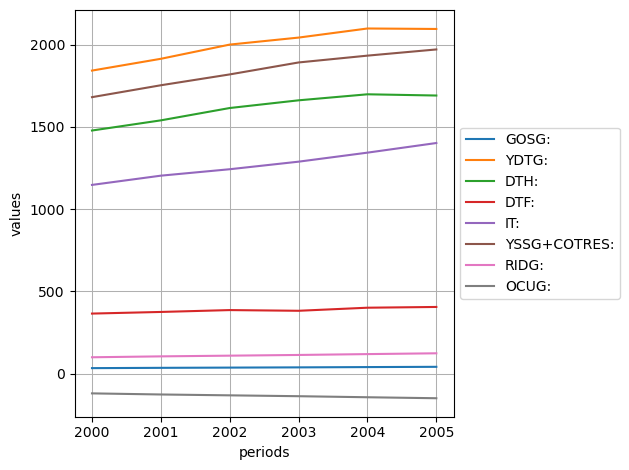

<Axes: xlabel='periods', ylabel='values'>

In [73]:
computed_table = table.compute("2000:6", nb_decimals=4)
computed_table.plot()

## Working with workspaces

As we seen above, `IODE` operates on objects of 7 different types:

- **comments**
- **equations**
- **identities**
- **lists**
- **scalars**
- **tables**
- **variables**

These are grouped into 7 dictionaries called `workspaces`. 

### Load workspaces

To load IODE objects from a binary file (i.e. with extension `.cmt`, `.eqs`, `.idt`, `.lst`, `.scl`, `.tbl`, `.var`) or from an ASCII file (i.e. with extension `.ac`, `.ae`, `.ai`, `.al`, `.as`, `.at`, `.av`), use the [load()](../_generated/iode.Comments.load.rst#iode.Comments.load) method of the corresponding object. For example:

In [74]:
# ---- load equations, identities, scalars and variables ----
from iode import comments, equations, identities, lists, scalars, tables, variables

# Note: test binary and ASCII 'fun' files are located in the 'Sample_DATA_DIR' 
#       directory of the 'iode' package
comments.load(f"{Sample_DATA_DIR}/fun.cmt")
equations.load(f"{Sample_DATA_DIR}/fun.eqs")
identities.load(f"{Sample_DATA_DIR}/fun.idt")
lists.load(f"{Sample_DATA_DIR}/fun.lst")
scalars.load(f"{Sample_DATA_DIR}/fun.scl")
tables.load(f"{Sample_DATA_DIR}/fun.tbl")
variables.load(f"{Sample_DATA_DIR}/fun.var")

# ---- print the number of objects present in the above workspaces ----
len(comments), len(equations), len(identities), len(lists), len(scalars), len(tables), len(variables)

Loading C:\soft\miniconda3\Lib\site-packages\iode\tests\data/fun.cmt
317 objects loaded
Loading C:\soft\miniconda3\Lib\site-packages\iode\tests\data/fun.eqs
274 objects loaded
Loading C:\soft\miniconda3\Lib\site-packages\iode\tests\data/fun.idt
48 objects loaded
Loading C:\soft\miniconda3\Lib\site-packages\iode\tests\data/fun.lst
17 objects loaded
Loading C:\soft\miniconda3\Lib\site-packages\iode\tests\data/fun.scl
161 objects loaded
Loading C:\soft\miniconda3\Lib\site-packages\iode\tests\data/fun.tbl
46 objects loaded
Loading C:\soft\miniconda3\Lib\site-packages\iode\tests\data/fun.var
394 objects loaded


(317, 274, 48, 17, 161, 46, 394)

### Explore workspaces

To get the list of objects names present in a workspace, use the [names](../_generated/iode.Comments.names.rst#iode.Comments.names) attribute of the workspace. 
For example:

In [75]:
# get the list of all IODE lists
lists.names

['COPY',
 'COPY0',
 'COPY1',
 'ENDO',
 'ENDO0',
 'ENDO1',
 'ENVI',
 'IDT',
 'MAINEQ',
 'MYLIST',
 'TOTAL',
 'TOTAL0',
 'TOTAL1',
 'XENVI',
 'XSCENARIO',
 '_SCAL',
 '_SEARCH']

To check if a name is present in a workspace, use the `in` operator. 
For example:

In [76]:
if 'ENVI' in lists:
    print("The 'ENVI' IODE list exists")
else:
    print("'ENVI' IODE list not found")

The 'ENVI' IODE list exists


To iterate over names of a workspace, simply use the Python syntax for the *for loop*:

In [77]:
print("Iterate over all IODE lists names in the Lists workspace:")
for name in lists:
    print(name)

Iterate over all IODE lists names in the Lists workspace:
COPY
COPY0
COPY1
ENDO
ENDO0
ENDO1
ENVI
IDT
MAINEQ
MYLIST
TOTAL
TOTAL0
TOTAL1
XENVI
XSCENARIO
_SCAL
_SEARCH


To get the current used sample for the Variables, use the [sample](../_generated/iode.Variables.sample.rst#iode.Variables.sample) attribute of the [variables](../_generated/iode.Variables.rst#iode.Variables) workspace:

In [78]:
# current used sample
variables.sample

Sample("1960Y1:2015Y1")

### Save workspaces

To save the content of a workspace (or a subset of a workspace), use the [save()](../_generated/iode.Variables.save.rst#iode.Variables.save) method:

In [79]:
# ---- save workspace (or subset) ----
# save the whole workspace
equations.save('equations.eqs')

# save only a subset of the global variables workspace
vars_subset = variables[["ACAF", "ACAG", "AQC", "BQY", "BVY"]]
vars_subset.save('variables_subset.av')    

print("Check content of the variables_subset.av file:\n")
with open("variables_subset.av", "r") as f:
    print(f.read())
print()

Saving c:\usr\Projects\iode-1\doc\source\tutorial\equations.eqs
274 objects saved
Saving c:\usr\Projects\iode-1\doc\source\tutorial\variables_subset.av
Check content of the variables_subset.av file:

sample 1960Y1 2015Y1
ACAF na na na na na na na na na na 1.2130001 5.2020001 9.184 8.0790005 11.332 13.518001 15.784 16.544001 21.489 20.281 21.277 32.417999 24.446999 27.025002 24.504 27.560999 25.542 27.499001 25.353001 17.165001 23.771 26.240999 30.159 34.661999 8.1610022 -13.130997 32.171001 39.935799 29.645657 13.530404919696 10.0466107922005 2.86792273645546 -0.929212509051645 -6.09156498756888 -14.5820944628981 -26.5387895697886 -28.9872879825975 -33.3784257842954 -38.4095177823974 -37.4635096412738 -37.8274288322944 -44.5447926335432 -55.5592898172187 -68.8946543226201 -83.3406251108009 -96.4104198284833 
ACAG na na na na na na na na na na -11.028999 -15.847 -19.288002 -21.814999 -25.447002 -24.618999 -27.770998 -28.839001 -29.434998 -30.411001 -30.353001 -41.060997 -31.178001 -32.6

### Workspace subsets

IODE workspaces can contains a lot objects and it can be sometimes easier to work on a subset of the objects present in a workspace. To get a subset of an IODE workspace, a *pattern* can be passed to the `[]` operator. 
A (sub-)`pattern` is a list of characters representing a group of object names. It includes some special characters which have a special meaning:

* `*` : any character sequence, even empty
* `?` : any character (one and only one)
* `@` : any alphanumerical char [A-Za-z0-9]
* `&` : any non alphanumerical char
* `|` : any alphanumeric character or none at the beginning and end of a string 
* `!` : any non-alphanumeric character or none at the beginning and end of a string 
* `\` : escape the next character

The *pattern* can contain sub-patterns, as well as, object names. The sub-patterns and object names are separated by a *separator* character which is either:

* a whitespace `' '`
* a comma `,`
* a semi-colon `;`
* a tabulation `\t`
* a newline `\n`

Note that the *pattern* can contain references to IODE lists which are prefixed with the symbol `$`:

In [80]:
vars_subset = variables["A*;*_"]
vars_subset

Workspace: Variables
nb variables: 33
filename: c:\soft\miniconda3\Lib\site-packages\iode\tests\data\fun.var
description: Modèle fun - Simulation 1                         
sample: 1960Y1:2015Y1
mode: LEVEL

 name	1960Y1	1961Y1	1962Y1	1963Y1	1964Y1	...	 2010Y1 	 2011Y1 	 2012Y1 	 2013Y1 	 2014Y1 	 2015Y1 
ACAF 	    na	    na	    na	    na	    na	...	  -37.83	  -44.54	  -55.56	  -68.89	  -83.34	  -96.41
ACAG 	    na	    na	    na	    na	    na	...	   28.25	   29.28	   30.32	   31.37	   32.42	   33.47
AOUC 	    na	  0.25	  0.25	  0.26	  0.28	...	    1.31	    1.33	    1.36	    1.39	    1.42	    1.46
AOUC_	    na	    na	    na	    na	    na	...	    1.25	    1.27	    1.30	    1.34	    1.37	    1.41
AQC  	  0.22	  0.22	  0.22	  0.23	  0.24	...	    1.46	    1.48	    1.51	    1.56	    1.61	    1.67
...  	   ...	   ...	   ...	   ...	   ...	...	     ...	     ...	     ...	     ...	     ...	     ...
WCF_ 	193.41	205.78	226.79	250.05	286.84	...	 5170.60	 5340.61	 5577.10	 5872.12	 6199.43	 6531.10


In [81]:
lists["ENVI"]

['EX',
 'PWMAB',
 'PWMS',
 'PWXAB',
 'PWXS',
 'QWXAB',
 'QWXS',
 'POIL',
 'NATY',
 'TFPFHP_']

In [82]:
vars_subset = variables["A*;$ENVI"]
vars_subset

Workspace: Variables
nb variables: 15
filename: c:\soft\miniconda3\Lib\site-packages\iode\tests\data\fun.var
description: Modèle fun - Simulation 1                         
sample: 1960Y1:2015Y1
mode: LEVEL

  name 	1960Y1	1961Y1	1962Y1	1963Y1	1964Y1	...	2010Y1	2011Y1	2012Y1	2013Y1	2014Y1	2015Y1
ACAF   	    na	    na	    na	    na	    na	...	-37.83	-44.54	-55.56	-68.89	-83.34	-96.41
ACAG   	    na	    na	    na	    na	    na	...	 28.25	 29.28	 30.32	 31.37	 32.42	 33.47
AOUC   	    na	  0.25	  0.25	  0.26	  0.28	...	  1.31	  1.33	  1.36	  1.39	  1.42	  1.46
AOUC_  	    na	    na	    na	    na	    na	...	  1.25	  1.27	  1.30	  1.34	  1.37	  1.41
AQC    	  0.22	  0.22	  0.22	  0.23	  0.24	...	  1.46	  1.48	  1.51	  1.56	  1.61	  1.67
...    	   ...	   ...	   ...	   ...	   ...	...	   ...	   ...	   ...	   ...	   ...	   ...
PWXAB  	  0.23	  0.23	  0.23	  0.23	  0.23	...	  1.44	  1.46	  1.49	  1.51	  1.54	  1.57
PWXS   	  0.21	  0.21	  0.21	  0.21	  0.21	...	  1.70	  1.73	  1.76	  1.79	  1.8

### Get - add - update - delete objects in a workspaces

In a similar way to Python dictionaries, you can [get](../_generated/iode.Equations.__getitem__.rst), [add](../_generated/iode.Equations.__setitem__.rst), [update](../_generated/iode.Equations.__setitem__.rst) and [delete](../_generated/iode.Equations.__delitem__.rst) IODE objects in a workspace using the `[]` operator.

* To extract an IODE object from a workspace, use the syntax: `my_obj = workspace[name]`.
* To add an IODE object to a workspace, use the syntax: `workspace[new_name] = new_obj`.
* To update an IODE object in a workspace, use the syntax: `workspace[name] = new_value`.
* To delete an IODE object from a workspace, use the syntax: `del workspace[name]`.

To add or update IODE objects using:

* a pandas Series or DataFrame, see the [pandas tutorial](./pandas.ipynb).
* an larray Array, see the [larray tutorial](./larray.ipynb).
* a numpy ndarray, see the [numpy tutorial](./numpy.ipynb).

#### Comments

Add one comment:

In [83]:
comments["NEW"] = "A new comment"
comments["NEW"]

'A new comment'

Update a comment:

In [84]:
comments["NEW"] = "New Value"
comments["NEW"]

'New Value'

Update multiple comments at once:

In [85]:
# 1) using a dict of values
values = {"AOUC": "Updated AOUC from dict", "ACAF": "Updated ACAF from dict", 
          "ACAG": "Updated ACAG from dict"}
comments["ACAF, ACAG, AOUC"] = values
comments["ACAF, ACAG, AOUC"]

Workspace: Comments
nb comments: 3
filename: c:\soft\miniconda3\Lib\site-packages\iode\tests\data\fun.cmt

name	       comments       
ACAF	Updated ACAF from dict
ACAG	Updated ACAG from dict
AOUC	Updated AOUC from dict

In [86]:
# 2) using another Comments database (subset)
comments_subset = comments["ACAF, ACAG, AOUC"].copy()
comments_subset["ACAF"] = "Updated ACAF from another iode Comments database"
comments_subset["ACAG"] = "Updated ACAG from another iode Comments database"
comments_subset["AOUC"] = "Updated AOUC from another iode Comments database"
comments["ACAF, ACAG, AOUC"] = comments_subset
comments["ACAF, ACAG, AOUC"]

Workspace: Comments
nb comments: 3
filename: c:\soft\miniconda3\Lib\site-packages\iode\tests\data\fun.cmt

name	                    comments                    
ACAF	Updated ACAF from another iode Comments database
ACAG	Updated ACAG from another iode Comments database
AOUC	Updated AOUC from another iode Comments database

Delete a comment:

In [87]:
comments.get_names("A*")

['ACAF', 'ACAG', 'AOUC', 'AQC']

In [88]:
del comments["ACAF"]
comments.get_names("A*")

['ACAG', 'AOUC', 'AQC']

#### Equations

Add one equation:

In [89]:
equations["TEST"] = "TEST := 0"
equations["TEST"]

Equation(endogenous = 'TEST',
         lec = 'TEST := 0',
         method = 'LSQ',
         from_period = '1960Y1',
         to_period = '2015Y1')

Update an equation:

In [90]:
equations["ACAF"]

Equation(endogenous = 'ACAF',
         lec = '(ACAF/VAF[-1]) :=acaf1+acaf2*GOSF[-1]+\nacaf4*(TIME=1995)',
         method = 'LSQ',
         from_period = '1980Y1',
         to_period = '1996Y1',
         block = 'ACAF',
         tests = {corr = 1,
                  dw = 2.32935,
                  fstat = 32.2732,
                  loglik = 83.8075,
                  meany = 0.00818467,
                  r2 = 0.821761,
                  r2adj = 0.796299,
                  ssres = 5.19945e-05,
                  stderr = 0.00192715,
                  stderrp = 23.5458,
                  stdev = 0.0042699},
         date = '12-06-1998')

In [91]:
# update only the LEC
equations["ACAF"] = "(ACAF/VAF[-1]) := acaf1 + acaf2 * GOSF[-1] + acaf4 * (TIME=1995)"
equations["ACAF"]

Equation(endogenous = 'ACAF',
         lec = '(ACAF/VAF[-1]) := acaf1 + acaf2 * GOSF[-1] + acaf4 * (TIME=1995)',
         method = 'LSQ',
         from_period = '1980Y1',
         to_period = '1996Y1',
         block = 'ACAF',
         tests = {corr = 1,
                  dw = 2.32935,
                  fstat = 32.2732,
                  loglik = 83.8075,
                  meany = 0.00818467,
                  r2 = 0.821761,
                  r2adj = 0.796299,
                  ssres = 5.19945e-05,
                  stderr = 0.00192715,
                  stderrp = 23.5458,
                  stdev = 0.0042699},
         date = '12-06-1998')

In [92]:
# update block and sample of a block of equations to estimation (dictionary)
estim_sample = "2000Y1:2010Y1"
block = "ACAF; ACAG; AOUC"
for eq_name in block.split(';'):
    equations[eq_name] = {"sample": estim_sample, "block": block}

(equations["ACAF"].sample, equations["ACAG"].sample, equations["AOUC"].sample)

(Sample("2000Y1:2010Y1"), Sample("2000Y1:2010Y1"), Sample("2000Y1:2010Y1"))

In [93]:
(equations["ACAF"].block, equations["ACAG"].block, equations["AOUC"].block)

('ACAF; ACAG; AOUC', 'ACAF; ACAG; AOUC', 'ACAF; ACAG; AOUC')

In [94]:
# update lec, method, sample and block
equations["ACAF"].lec = "(ACAF/VAF[-1]) := acaf2 * GOSF[-1] + acaf4 * (TIME=1995)"
equations["ACAF"].method = EqMethod.MAX_LIKELIHOOD
# new equation sample is from 1990Y1 to the last year of Variables
equations["ACAF"].sample = "1990Y1:"
equations["ACAF"].block = "ACAF"
equations["ACAF"]

Equation(endogenous = 'ACAF',
         lec = '(ACAF/VAF[-1]) := acaf2 * GOSF[-1] + acaf4 * (TIME=1995)',
         method = 'MAX_LIKELIHOOD',
         from_period = '1990Y1',
         to_period = '2015Y1',
         block = 'ACAF',
         tests = {corr = 1,
                  dw = 2.32935,
                  fstat = 32.2732,
                  loglik = 83.8075,
                  meany = 0.00818467,
                  r2 = 0.821761,
                  r2adj = 0.796299,
                  ssres = 5.19945e-05,
                  stderr = 0.00192715,
                  stderrp = 23.5458,
                  stdev = 0.0042699},
         date = '12-06-1998')

Update multiple equations at once:

In [95]:
# 1) using a dict of values
eq_ACAF = Equation("ACAF", "(ACAF/VAF[-1]) :=acaf1+acaf2*GOSF[-1]+ acaf4*(TIME=1995)", 
                   method=EqMethod.ZELLNER, from_period='1980Y1', to_period='1996Y1')
eq_ACAG = Equation("ACAG", "ACAG := ACAG[-1]+r VBBP[-1]+(0.006*VBBP[-1]*(TIME=2001)-0.008*(TIME=2008))", 
                   method=EqMethod.ZELLNER, from_period='1980Y1', to_period='1996Y1')
eq_AOUC = Equation("AOUC", "AOUC:=((WCRH/QL)/(WCRH/QL)[1990Y1])*(VAFF/(VM+VAFF))[-1]+PM*(VM/(VAFF+VM))[-1]", 
                   method=EqMethod.ZELLNER, from_period='1980Y1', to_period='1996Y1')
values = {"ACAF": eq_ACAF, "ACAG": eq_ACAG, "AOUC": eq_AOUC}
equations["ACAF, ACAG, AOUC"] = values
equations["ACAF, ACAG, AOUC"]

Workspace: Equations
nb equations: 3
filename: c:\usr\Projects\iode-1\doc\source\tutorial\equations.eqs

name	                                     lec                                      	 method	    sample   	block	fstat 	r2adj 	  dw  	loglik	date
ACAF	(ACAF/VAF[-1]) :=acaf1+acaf2*GOSF[-1]+ acaf4*(TIME=1995)                      	ZELLNER	1980Y1:1996Y1	     	0.0000	0.0000	0.0000	0.0000	    
ACAG	ACAG := ACAG[-1]+r VBBP[-1]+(0.006*VBBP[-1]*(TIME=2001)-0.008*(TIME=2008))    	ZELLNER	1980Y1:1996Y1	     	0.0000	0.0000	0.0000	0.0000	    
AOUC	AOUC:=((WCRH/QL)/(WCRH/QL)[1990Y1])*(VAFF/(VM+VAFF))[-1]+PM*(VM/(VAFF+VM))[-1]	ZELLNER	1980Y1:1996Y1	     	0.0000	0.0000	0.0000	0.0000	    

In [96]:
# 2) using another Equations database (subset)
equations_subset = equations["ACAF, ACAG, AOUC"].copy()
equations_subset["ACAF"].method = EqMethod.MAX_LIKELIHOOD
equations_subset["ACAG"].method = EqMethod.MAX_LIKELIHOOD
equations_subset["AOUC"].method = EqMethod.MAX_LIKELIHOOD
equations["ACAF, ACAG, AOUC"] = equations_subset
equations["ACAF, ACAG, AOUC"]

Workspace: Equations
nb equations: 3
filename: c:\usr\Projects\iode-1\doc\source\tutorial\equations.eqs

name	                                     lec                                      	    method    	    sample   	block	fstat 	r2adj 	  dw  	loglik	date
ACAF	(ACAF/VAF[-1]) :=acaf1+acaf2*GOSF[-1]+ acaf4*(TIME=1995)                      	MAX_LIKELIHOOD	1980Y1:1996Y1	     	0.0000	0.0000	0.0000	0.0000	    
ACAG	ACAG := ACAG[-1]+r VBBP[-1]+(0.006*VBBP[-1]*(TIME=2001)-0.008*(TIME=2008))    	MAX_LIKELIHOOD	1980Y1:1996Y1	     	0.0000	0.0000	0.0000	0.0000	    
AOUC	AOUC:=((WCRH/QL)/(WCRH/QL)[1990Y1])*(VAFF/(VM+VAFF))[-1]+PM*(VM/(VAFF+VM))[-1]	MAX_LIKELIHOOD	1980Y1:1996Y1	     	0.0000	0.0000	0.0000	0.0000	    

Delete an equation:

In [97]:
equations.get_names("A*")

['ACAF', 'ACAG', 'AOUC']

In [98]:
del equations["ACAF"]
equations.get_names("A*")

['ACAG', 'AOUC']

#### Identities

Add one identity:

In [99]:
identities["BDY"] = "YN - YK"
identities["BDY"]

Identity('YN - YK')

Update an identity:

In [100]:
identities["AOUC"]

Identity('((WCRH/QL)/(WCRH/QL)[1990Y1])*(VAFF/(VM+VAFF))[-1]+PM*(VM/(VM+VAFF))[-1]')

In [101]:
identities["AOUC"] = '(WCRH / WCRH[1990Y1]) * (VAFF / (VM+VAFF))[-1] + PM * (VM / (VM+VAFF))[-1]'
identities["AOUC"]

Identity('(WCRH / WCRH[1990Y1]) * (VAFF / (VM+VAFF))[-1] + PM * (VM / (VM+VAFF))[-1]')

Update multiple identities at once:

In [102]:
# 1) using a dict of values
values = {"GAP2": "0.9 * 100*(QAFF_/(Q_F+Q_I))", "GAP_": "0.9 * 100*((QAF_/Q_F)-1)", 
          "GOSFR": "0.9 * (GOSF/VAF_)"}
identities["GAP2, GAP_, GOSFR"] = values
identities["GAP2, GAP_, GOSFR"]

Workspace: Identities
nb identities: 3
filename: c:\soft\miniconda3\Lib\site-packages\iode\tests\data\fun.idt

 name	         identities        
GAP2 	0.9 * 100*(QAFF_/(Q_F+Q_I))
GAP_ 	0.9 * 100*((QAF_/Q_F)-1)   
GOSFR	0.9 * (GOSF/VAF_)          

In [103]:
# 2) using another Identities database (subset)
identities_subset = identities["GAP2, GAP_, GOSFR"].copy()
identities_subset["GAP2"] = "0.7 * 100*(QAFF_/(Q_F+Q_I))"
identities_subset["GAP_"] = "0.7 * 100*((QAF_/Q_F)-1)"
identities_subset["GOSFR"] = "0.7 * (GOSF/VAF_)"
identities["GAP2, GAP_, GOSFR"] = identities_subset
identities["GAP2, GAP_, GOSFR"]

Workspace: Identities
nb identities: 3
filename: c:\soft\miniconda3\Lib\site-packages\iode\tests\data\fun.idt

 name	         identities        
GAP2 	0.7 * 100*(QAFF_/(Q_F+Q_I))
GAP_ 	0.7 * 100*((QAF_/Q_F)-1)   
GOSFR	0.7 * (GOSF/VAF_)          

Delete an identity:

In [104]:
identities.get_names("W*")

['W', 'WBGR', 'WCRH', 'WMINR', 'WO']

In [105]:
del identities["W"]
identities.get_names("W*")

['WBGR', 'WCRH', 'WMINR', 'WO']

#### Lists

Add one list:

In [106]:
# --- by passing a string
lists["A_VAR"] = "ACAF;ACAG;AOUC;AOUC_;AQC"
lists["A_VAR"]

['ACAF', 'ACAG', 'AOUC', 'AOUC_', 'AQC']

In [107]:
# --- by passing a Python list
b_vars = variables.get_names("B*")
b_vars

['BENEF', 'BQY', 'BRUGP', 'BVY']

In [108]:
lists["B_VAR"] = b_vars
lists["B_VAR"]

['BENEF', 'BQY', 'BRUGP', 'BVY']

Update a list:

In [109]:
# --- by passing a string
lists["A_VAR"] = "ACAF;ACAG;AOUC;AQC"
lists["A_VAR"]

['ACAF', 'ACAG', 'AOUC', 'AQC']

In [110]:
# --- by passing a Python list
b_y_vars = variables.get_names("B*Y")
b_y_vars

['BQY', 'BVY']

In [111]:
lists["B_VAR"] = b_y_vars
lists["B_VAR"]

['BQY', 'BVY']

Update multiple lists at once:

In [112]:
# 1) using a dict of values
values = {"ENVI": "PWMAB; PWMS; PWXAB; PWXS; QWXAB; QWXS; POIL; NATY",
          "IDT": "FLGR; KL; PROD; QL; RDEBT; RENT; RLBER; SBGX; WCRH; IUGR; SBGXR; WBGR; YSFICR",
          "MAINEQ": "NFYH; KNFF; PC; PXAB; PMAB; QXAB; QMAB"}
lists["ENVI, IDT, MAINEQ"] = values
lists["ENVI, IDT, MAINEQ"]

Workspace: Lists
nb lists: 3
filename: c:\soft\miniconda3\Lib\site-packages\iode\tests\data\fun.lst
description: Modèle fun                                        

 name 	                                    lists                                    
ENVI  	PWMAB; PWMS; PWXAB; PWXS; QWXAB; QWXS; POIL; NATY                            
IDT   	FLGR; KL; PROD; QL; RDEBT; RENT; RLBER; SBGX; WCRH; IUGR; SBGXR; WBGR; YSFICR
MAINEQ	NFYH; KNFF; PC; PXAB; PMAB; QXAB; QMAB                                       

In [113]:
# 2) using another Lists database (subset)
lists_subset = lists["ENVI, IDT, MAINEQ"].copy()
lists_subset["ENVI"] = "PWXAB; PWXS; QWXAB; QWXS"
lists_subset["IDT"] = "PROD; QL; RDEBT; RENT; RLBER; SBGX; WCRH; IUGR; SBGXR"
lists_subset["MAINEQ"] = "PC; PXAB; PMAB"
lists["ENVI, IDT, MAINEQ"] = lists_subset
lists["ENVI, IDT, MAINEQ"]

Workspace: Lists
nb lists: 3
filename: c:\soft\miniconda3\Lib\site-packages\iode\tests\data\fun.lst
description: Modèle fun                                        

 name 	                        lists                        
ENVI  	PWXAB; PWXS; QWXAB; QWXS                             
IDT   	PROD; QL; RDEBT; RENT; RLBER; SBGX; WCRH; IUGR; SBGXR
MAINEQ	PC; PXAB; PMAB                                       

Delete a list:

In [114]:
lists.get_names("C*")

['COPY', 'COPY0', 'COPY1']

In [115]:
del lists["COPY"]
lists.get_names("C*")

['COPY0', 'COPY1']

#### Scalars

Add one scalar:

In [116]:
# 1. default relax to 1.0
scalars["a0"] = 0.1
scalars["a0"]

Scalar(0.1, 1, na)

In [117]:
# 2. value + relax
scalars["a1"] = 0.1, 0.9
scalars["a1"]

Scalar(0.1, 0.9, na)

Update a scalar:

In [118]:
scalars["acaf1"]

Scalar(0.0157684, 1, 0.00136871)

In [119]:
# only update the value
scalars["acaf1"] = 0.8
scalars["acaf1"]

Scalar(0.8, 1, na)

In [120]:
# update value and relax (tuple)
scalars["acaf2"] = 0.8, 0.9
scalars["acaf2"]

Scalar(0.8, 0.9, na)

In [121]:
# update value and relax (list)
scalars["acaf2"] = (0.7, 0.8)
scalars["acaf2"]

Scalar(0.7, 0.8, na)

In [122]:
# update value and relax (dictionary)
scalars["acaf3"] = {"relax": 0.9, "value": 0.8}
scalars["acaf3"]

Scalar(0.8, 0.9, na)

In [123]:
# update value and/or relax (Scalar object)
# NOTE: the standard deviation (std) cannot be changed manually
scalars["acaf4"]

Scalar(-0.00850518, 1, 0.0020833)

In [124]:
scalars["acaf4"].value = 0.8
scalars["acaf4"].relax = 0.9
scalars["acaf4"]

Scalar(0.8, 0.9, na)

Update multiple scalars at once:

In [125]:
# 1) using a dict of values
values = {"acaf1": 0.016, "acaf2": (-8.e-04, 0.9), "acaf3": Scalar(2.5)}
scalars["acaf1, acaf2, acaf3"] = values
scalars["acaf1, acaf2, acaf3"]

Workspace: Scalars
nb scalars: 3
filename: c:\soft\miniconda3\Lib\site-packages\iode\tests\data\fun.scl

 name	 value 	relax 	std
acaf1	 0.0160	1.0000	 na
acaf2	-0.0008	0.9000	 na
acaf3	 2.5000	1.0000	 na

In [126]:
# 2) using another Scalars database (subset)
scalars_subset = scalars["acaf1, acaf2, acaf3"].copy()
scalars_subset["acaf1"] = 0.02
scalars_subset["acaf2"] = (-5.e-04, 0.94)
scalars_subset["acaf3"] = Scalar(2.9)
scalars["acaf1, acaf2, acaf3"] = scalars_subset
scalars["acaf1, acaf2, acaf3"]

Workspace: Scalars
nb scalars: 3
filename: c:\soft\miniconda3\Lib\site-packages\iode\tests\data\fun.scl

 name	 value 	relax 	std
acaf1	 0.0200	1.0000	 na
acaf2	-0.0005	0.9400	 na
acaf3	 2.9000	1.0000	 na

Delete a scalar:

In [127]:
scalars.get_names("a*")

['a0', 'a1', 'acaf1', 'acaf2', 'acaf3', 'acaf4']

In [128]:
del scalars["acaf4"]
scalars.get_names("a*")

['a0', 'a1', 'acaf1', 'acaf2', 'acaf3']

#### Tables

Create an add a new table:

In [129]:
# 1. specify list of line titles and list of LEC expressions
lines_titles = ["GOSG:", "YDTG:", "DTH:", "DTF:", "IT:", "YSSG+COTRES:", "RIDG:", "OCUG:"]
lines_lecs = ["GOSG", "YDTG", "DTH", "DTF", "IT", "YSSG+COTRES", "RIDG", "OCUG"]
tables["TABLE_CELL_LECS"] = {"nb_columns": 2, "table_title": "New Table", "lecs_or_vars": lines_lecs,
                             "lines_titles": lines_titles, "mode": True, "files": True, "date": True}
tables["TABLE_CELL_LECS"]

DIVIS | 1              |            
TITLE |         "New Table"         
----- | ----------------------------
CELL  | ""             |     "#S"   
----- | ----------------------------
CELL  | "GOSG:"        |        GOSG
CELL  | "YDTG:"        |        YDTG
CELL  | "DTH:"         |         DTH
CELL  | "DTF:"         |         DTF
CELL  | "IT:"          |          IT
CELL  | "YSSG+COTRES:" | YSSG+COTRES
CELL  | "RIDG:"        |        RIDG
CELL  | "OCUG:"        |        OCUG
----- | ----------------------------
MODE  | 
FILES | 
DATE  | 

nb lines: 16
nb columns: 2
language: 'ENGLISH'
gridx: 'MAJOR'
gridy: 'MAJOR'
graph_axis: 'VALUES'
graph_alignment: 'LEFT'

In [130]:
# 2. specify list of variables
vars_list = ["GOSG", "YDTG", "DTH", "DTF", "IT", "YSSG", "COTRES", "RIDG", "OCUG", "$ENVI"]
tables["TABLE_VARS"] = {"nb_columns": 2, "table_title": "New Table", "lecs_or_vars": vars_list,
                        "mode": True, "files": True, "date": True}
tables["TABLE_VARS"]

DIVIS | 1                                                                    |       
TITLE |                                  "New Table"                                 
----- | -----------------------------------------------------------------------------
CELL  | ""                                                                   |  "#S" 
----- | -----------------------------------------------------------------------------
CELL  | "Bruto exploitatie-overschot: overheid (= afschrijvingen)."          |   GOSG
CELL  | "Overheid: geïnde indirecte belastingen."                            |   YDTG
CELL  | "Totale overheid: directe belasting van de gezinnen."                |    DTH
CELL  | "Totale overheid: directe vennootschapsbelasting."                   |    DTF
CELL  | "Totale indirecte belastingen."                                      |     IT
CELL  | "Globale overheid: ontvangen sociale zekerheidsbijdragen."           |   YSSG
CELL  | "Cotisation de responsabilisation."           

Update a table:

In [131]:
tables["TABLE_CELL_LECS"]               

DIVIS | 1              |            
TITLE |         "New Table"         
----- | ----------------------------
CELL  | ""             |     "#S"   
----- | ----------------------------
CELL  | "GOSG:"        |        GOSG
CELL  | "YDTG:"        |        YDTG
CELL  | "DTH:"         |         DTH
CELL  | "DTF:"         |         DTF
CELL  | "IT:"          |          IT
CELL  | "YSSG+COTRES:" | YSSG+COTRES
CELL  | "RIDG:"        |        RIDG
CELL  | "OCUG:"        |        OCUG
----- | ----------------------------
MODE  | 
FILES | 
DATE  | 

nb lines: 16
nb columns: 2
language: 'ENGLISH'
gridx: 'MAJOR'
gridy: 'MAJOR'
graph_axis: 'VALUES'
graph_alignment: 'LEFT'

In [132]:
tables["TABLE_CELL_LECS"].graph_axis

'VALUES'

In [133]:
from iode import TableGraphAxis
# set graph axis type
tables["TABLE_CELL_LECS"].graph_axis = TableGraphAxis.SEMILOG
tables["TABLE_CELL_LECS"].graph_axis

'SEMILOG'

In [134]:
# get the first line
tables["TABLE_CELL_LECS"][0]

New Table

In [135]:
# get the last line
tables["TABLE_CELL_LECS"][-1]

<DATE>

In [136]:
# delete last line
del tables["TABLE_CELL_LECS"][-1]
tables["TABLE_CELL_LECS"]

DIVIS | 1              |            
TITLE |         "New Table"         
----- | ----------------------------
CELL  | ""             |     "#S"   
----- | ----------------------------
CELL  | "GOSG:"        |        GOSG
CELL  | "YDTG:"        |        YDTG
CELL  | "DTH:"         |         DTH
CELL  | "DTF:"         |         DTF
CELL  | "IT:"          |          IT
CELL  | "YSSG+COTRES:" | YSSG+COTRES
CELL  | "RIDG:"        |        RIDG
CELL  | "OCUG:"        |        OCUG
----- | ----------------------------
MODE  | 
FILES | 

nb lines: 15
nb columns: 2
language: 'ENGLISH'
gridx: 'MAJOR'
gridy: 'MAJOR'
graph_axis: 'SEMILOG'
graph_alignment: 'LEFT'

In [137]:
# get index of line containing YSSG+COTRES
index = tables["TABLE_CELL_LECS"].index("YSSG+COTRES")
index

9

In [138]:
tables["TABLE_CELL_LECS"][index]

('"YSSG+COTRES:"', 'YSSG+COTRES')

In [139]:
# get line type
tables["TABLE_CELL_LECS"][index].line_type

'CELL'

In [140]:
# get line graph type
tables["TABLE_CELL_LECS"][index].graph_type

'LINE'

In [141]:
# know if axis is left
tables["TABLE_CELL_LECS"][index].axis_left

True

In [142]:
# update cells
# double quotes "    -> STRING cell
# no double quotes   -> LEC cell
tables["TABLE_CELL_LECS"][index] = ('"YSSG:"', 'YSSG')
tables["TABLE_CELL_LECS"][index]

('"YSSG:"', 'YSSG')

In [143]:
# insert a new title line surrounded by two separator lines
tables["TABLE_CELL_LECS"].insert(index + 1, '-')
tables["TABLE_CELL_LECS"].insert(index + 2, "New Title")
tables["TABLE_CELL_LECS"].insert(index + 3, '-')
tables["TABLE_CELL_LECS"]

DIVIS | 1       |     
TITLE |  "New Table"  
----- | --------------
CELL  | ""      | "#S"
----- | --------------
CELL  | "GOSG:" | GOSG
CELL  | "YDTG:" | YDTG
CELL  | "DTH:"  |  DTH
CELL  | "DTF:"  |  DTF
CELL  | "IT:"   |   IT
CELL  | "YSSG:" | YSSG
----- | --------------
TITLE |  "New Title"  
----- | --------------
CELL  | "RIDG:" | RIDG
CELL  | "OCUG:" | OCUG
----- | --------------
MODE  | 
FILES | 

nb lines: 18
nb columns: 2
language: 'ENGLISH'
gridx: 'MAJOR'
gridy: 'MAJOR'
graph_axis: 'SEMILOG'
graph_alignment: 'LEFT'

In [144]:
# append a new sepatator line
tables["TABLE_CELL_LECS"] += '-'
tables["TABLE_CELL_LECS"]

DIVIS | 1       |     
TITLE |  "New Table"  
----- | --------------
CELL  | ""      | "#S"
----- | --------------
CELL  | "GOSG:" | GOSG
CELL  | "YDTG:" | YDTG
CELL  | "DTH:"  |  DTH
CELL  | "DTF:"  |  DTF
CELL  | "IT:"   |   IT
CELL  | "YSSG:" | YSSG
----- | --------------
TITLE |  "New Title"  
----- | --------------
CELL  | "RIDG:" | RIDG
CELL  | "OCUG:" | OCUG
----- | --------------
MODE  | 
FILES | 
----- | --------------

nb lines: 19
nb columns: 2
language: 'ENGLISH'
gridx: 'MAJOR'
gridy: 'MAJOR'
graph_axis: 'SEMILOG'
graph_alignment: 'LEFT'

Update multiple tables at once:

In [145]:
# 1) using a dict of values
table_C8_1 = tables["C8_1"].copy()
table_C8_1.title = table_C8_1.title + " (copy)"
table_C8_2 = tables["C8_2"].copy()
table_C8_2.title = table_C8_2.title + " (copy)"
table_C8_3 = tables["C8_3"].copy()
table_C8_3.title = table_C8_3.title + " (copy)"

values = {"C8_1": table_C8_1, "C8_2": table_C8_2, "C8_3": table_C8_3}
tables["C8_1, C8_2, C8_3"] = values
tables["C8_1, C8_2, C8_3"]

Workspace: Tables
nb tables: 3
filename: c:\soft\miniconda3\Lib\site-packages\iode\tests\data\fun.tbl

name	               table titles              
C8_1	Déterminants de l'output potentiel (copy)
C8_2	Déterminants de la productivité (copy)   
C8_3	Output gap (copy)                        

In [146]:
# 2) using another tables database (subset)
tables_subset = tables["C8_1, C8_2, C8_3"].copy()
tables_subset["C8_1"].title = tables_subset["C8_1"].title.replace("(copy)", "(detached subset)")
tables_subset["C8_2"].title = tables_subset["C8_2"].title.replace("(copy)", "(detached subset)")
tables_subset["C8_3"].title = tables_subset["C8_3"].title.replace("(copy)", "(detached subset)")

tables["C8_1, C8_2, C8_3"] = tables_subset
tables["C8_1, C8_2, C8_3"]

Workspace: Tables
nb tables: 3
filename: c:\soft\miniconda3\Lib\site-packages\iode\tests\data\fun.tbl

name	                    table titles                    
C8_1	Déterminants de l'output potentiel (detached subset)
C8_2	Déterminants de la productivité (detached subset)   
C8_3	Output gap (detached subset)                        

Delete a table:

In [147]:
tables.get_names("G*")

['GAP', 'GDP', 'GFR', 'GFRLEVEL', 'GFRPC', 'GROWTH']

In [148]:
del tables["GFRLEVEL"]
tables.get_names("G*")

['GAP', 'GDP', 'GFR', 'GFRPC', 'GROWTH']

#### Variables

Get variable:

In [149]:
# get the value for a single period -> float 
variables["ACAF", "1990Y1"]

23.771

In [150]:
# get the values for all periods -> Variables
variables["ACAF"]

Workspace: Variables
nb variables: 1
filename: c:\soft\miniconda3\Lib\site-packages\iode\tests\data\fun.var
description: Modèle fun - Simulation 1                         
sample: 1960Y1:2015Y1
mode: LEVEL

name	1960Y1	1961Y1	1962Y1	1963Y1	1964Y1	1965Y1	...	2009Y1	2010Y1	2011Y1	2012Y1	2013Y1	2014Y1	2015Y1
ACAF	    na	    na	    na	    na	    na	    na	...	-37.46	-37.83	-44.54	-55.56	-68.89	-83.34	-96.41

In [151]:
# get the values for a range of periods -> Variables
variables["ACAF", "1990Y1:2000Y1"]

Workspace: Variables
nb variables: 1
filename: c:\soft\miniconda3\Lib\site-packages\iode\tests\data\fun.var
description: Modèle fun - Simulation 1                         
sample: 1990Y1:2000Y1
mode: LEVEL

name	1990Y1	1991Y1	1992Y1	1993Y1	1994Y1	1995Y1	1996Y1	1997Y1	1998Y1	1999Y1	2000Y1
ACAF	 23.77	 26.24	 30.16	 34.66	  8.16	-13.13	 32.17	 39.94	 29.65	 13.53	 10.05

In [152]:
# get the values for a list non-contiguous periods -> pandas Series 
variables["ACAF", ["1990Y1", "1995Y1", "2000Y1"]]

time
1990Y1    23.771000
1995Y1   -13.130997
2000Y1    10.046611
Name: ACAF, dtype: float64

Get values for a single period:

In [153]:
variables[:, "1990Y1"]

Workspace: Variables
nb variables: 394
filename: c:\soft\miniconda3\Lib\site-packages\iode\tests\data\fun.var
description: Modèle fun - Simulation 1                         
sample: 1990Y1:1990Y1
mode: LEVEL

 name	1990Y1
ACAF 	 23.77
ACAG 	-28.17
AOUC 	  1.00
AOUC_	  0.94
AQC  	  1.00
...  	   ...
ZJ   	  1.09
ZKF  	  0.81
ZKFO 	  1.00
ZX   	  0.00
ZZF_ 	  0.69

or equivalently:

In [154]:
variables["*", "1990Y1"]

Workspace: Variables
nb variables: 394
filename: c:\soft\miniconda3\Lib\site-packages\iode\tests\data\fun.var
description: Modèle fun - Simulation 1                         
sample: 1990Y1:1990Y1
mode: LEVEL

 name	1990Y1
ACAF 	 23.77
ACAG 	-28.17
AOUC 	  1.00
AOUC_	  0.94
AQC  	  1.00
...  	   ...
ZJ   	  1.09
ZKF  	  0.81
ZKFO 	  1.00
ZX   	  0.00
ZZF_ 	  0.69

Add one variable:

In [155]:
# 1) same value for all periods
# NOTE: you can also use NA from iode to set a variable value to NaN
variables["A0"] = np.nan 
variables["A0"]

Workspace: Variables
nb variables: 1
filename: c:\soft\miniconda3\Lib\site-packages\iode\tests\data\fun.var
description: Modèle fun - Simulation 1                         
sample: 1960Y1:2015Y1
mode: LEVEL

name	1960Y1	1961Y1	1962Y1	1963Y1	1964Y1	1965Y1	...	2009Y1	2010Y1	2011Y1	2012Y1	2013Y1	2014Y1	2015Y1
A0  	    na	    na	    na	    na	    na	    na	...	    na	    na	    na	    na	    na	    na	    na

In [156]:
# 2) LEC expression
variables["A1"] = "t + 10"
variables["A1"] 

Workspace: Variables
nb variables: 1
filename: c:\soft\miniconda3\Lib\site-packages\iode\tests\data\fun.var
description: Modèle fun - Simulation 1                         
sample: 1960Y1:2015Y1
mode: LEVEL

name	1960Y1	1961Y1	1962Y1	1963Y1	1964Y1	1965Y1	...	2009Y1	2010Y1	2011Y1	2012Y1	2013Y1	2014Y1	2015Y1
A1  	 10.00	 11.00	 12.00	 13.00	 14.00	 15.00	...	 59.00	 60.00	 61.00	 62.00	 63.00	 64.00	 65.00

In [157]:
# 3) list of values for each period
values = list(range(variables.nb_periods))
values[0] = NA
values[-1] = np.nan
variables["A2"] = values
variables["A2"]                     

Workspace: Variables
nb variables: 1
filename: c:\soft\miniconda3\Lib\site-packages\iode\tests\data\fun.var
description: Modèle fun - Simulation 1                         
sample: 1960Y1:2015Y1
mode: LEVEL

name	1960Y1	1961Y1	1962Y1	1963Y1	1964Y1	1965Y1	...	2009Y1	2010Y1	2011Y1	2012Y1	2013Y1	2014Y1	2015Y1
A2  	    na	  1.00	  2.00	  3.00	  4.00	  5.00	...	 49.00	 50.00	 51.00	 52.00	 53.00	 54.00	    na

In [158]:
# 4) Variables object
variables["A5"] = variables["ACAF"]
variables["A5"]

Workspace: Variables
nb variables: 1
filename: c:\soft\miniconda3\Lib\site-packages\iode\tests\data\fun.var
description: Modèle fun - Simulation 1                         
sample: 1960Y1:2015Y1
mode: LEVEL

name	1960Y1	1961Y1	1962Y1	1963Y1	1964Y1	1965Y1	...	2009Y1	2010Y1	2011Y1	2012Y1	2013Y1	2014Y1	2015Y1
A5  	    na	    na	    na	    na	    na	    na	...	-37.46	-37.83	-44.54	-55.56	-68.89	-83.34	-96.41

Update a variable.

Set one value of a variable for a specific period:

In [159]:
variables["ACAG", "1990Y1"]

-28.1721855713507

In [160]:
variables["ACAG", "1990Y1"] = -28.2
variables["ACAG", "1990Y1"]

-28.2

Update all values of a variable:

In [161]:
variables["ACAF"]                   

Workspace: Variables
nb variables: 1
filename: c:\soft\miniconda3\Lib\site-packages\iode\tests\data\fun.var
description: Modèle fun - Simulation 1                         
sample: 1960Y1:2015Y1
mode: LEVEL

name	1960Y1	1961Y1	1962Y1	1963Y1	1964Y1	1965Y1	...	2009Y1	2010Y1	2011Y1	2012Y1	2013Y1	2014Y1	2015Y1
ACAF	    na	    na	    na	    na	    na	    na	...	-37.46	-37.83	-44.54	-55.56	-68.89	-83.34	-96.41

In [162]:
# 1) same value for all periods
variables["ACAF"] = np.nan
variables["ACAF"]                   

Workspace: Variables
nb variables: 1
filename: c:\soft\miniconda3\Lib\site-packages\iode\tests\data\fun.var
description: Modèle fun - Simulation 1                         
sample: 1960Y1:2015Y1
mode: LEVEL

name	1960Y1	1961Y1	1962Y1	1963Y1	1964Y1	1965Y1	...	2009Y1	2010Y1	2011Y1	2012Y1	2013Y1	2014Y1	2015Y1
ACAF	    na	    na	    na	    na	    na	    na	...	    na	    na	    na	    na	    na	    na	    na

In [163]:
# 2) LEC expression
variables["ACAF"] = "t + 10"
variables["ACAF"]                 

Workspace: Variables
nb variables: 1
filename: c:\soft\miniconda3\Lib\site-packages\iode\tests\data\fun.var
description: Modèle fun - Simulation 1                         
sample: 1960Y1:2015Y1
mode: LEVEL

name	1960Y1	1961Y1	1962Y1	1963Y1	1964Y1	1965Y1	...	2009Y1	2010Y1	2011Y1	2012Y1	2013Y1	2014Y1	2015Y1
ACAF	 10.00	 11.00	 12.00	 13.00	 14.00	 15.00	...	 59.00	 60.00	 61.00	 62.00	 63.00	 64.00	 65.00

In [164]:
# 3) list of values for each period
values = list(range(variables.nb_periods))
values[0] = NA
values[-1] = np.nan
variables["ACAF"] = values
variables["ACAF"]              

Workspace: Variables
nb variables: 1
filename: c:\soft\miniconda3\Lib\site-packages\iode\tests\data\fun.var
description: Modèle fun - Simulation 1                         
sample: 1960Y1:2015Y1
mode: LEVEL

name	1960Y1	1961Y1	1962Y1	1963Y1	1964Y1	1965Y1	...	2009Y1	2010Y1	2011Y1	2012Y1	2013Y1	2014Y1	2015Y1
ACAF	    na	  1.00	  2.00	  3.00	  4.00	  5.00	...	 49.00	 50.00	 51.00	 52.00	 53.00	 54.00	    na

In [165]:
# 4) Variables object
variables["AQC"]

Workspace: Variables
nb variables: 1
filename: c:\soft\miniconda3\Lib\site-packages\iode\tests\data\fun.var
description: Modèle fun - Simulation 1                         
sample: 1960Y1:2015Y1
mode: LEVEL

name	1960Y1	1961Y1	1962Y1	1963Y1	1964Y1	1965Y1	...	2009Y1	2010Y1	2011Y1	2012Y1	2013Y1	2014Y1	2015Y1
AQC 	  0.22	  0.22	  0.22	  0.23	  0.24	  0.25	...	  1.45	  1.46	  1.48	  1.51	  1.56	  1.61	  1.67

In [166]:
variables["ACAF"] = variables["AQC"]
variables["ACAF"]

Workspace: Variables
nb variables: 1
filename: c:\soft\miniconda3\Lib\site-packages\iode\tests\data\fun.var
description: Modèle fun - Simulation 1                         
sample: 1960Y1:2015Y1
mode: LEVEL

name	1960Y1	1961Y1	1962Y1	1963Y1	1964Y1	1965Y1	...	2009Y1	2010Y1	2011Y1	2012Y1	2013Y1	2014Y1	2015Y1
ACAF	  0.22	  0.22	  0.22	  0.23	  0.24	  0.25	...	  1.45	  1.46	  1.48	  1.51	  1.56	  1.61	  1.67

Set the values for range of (contiguous) periods:

In [167]:
# 1) variable[t:t+x] = same value for all periods
variables["ACAF", "1991Y1:1995Y1"] = 0.0
variables["ACAF", "1991Y1:1995Y1"]

Workspace: Variables
nb variables: 1
filename: c:\soft\miniconda3\Lib\site-packages\iode\tests\data\fun.var
description: Modèle fun - Simulation 1                         
sample: 1991Y1:1995Y1
mode: LEVEL

name	1991Y1	1992Y1	1993Y1	1994Y1	1995Y1
ACAF	  0.00	  0.00	  0.00	  0.00	  0.00

In [168]:
# 2) variable[t:t+x] = LEC expression
variables["ACAF", "1991Y1:1995Y1"] = "t + 10"
variables["ACAF", "1991Y1:1995Y1"]

Workspace: Variables
nb variables: 1
filename: c:\soft\miniconda3\Lib\site-packages\iode\tests\data\fun.var
description: Modèle fun - Simulation 1                         
sample: 1991Y1:1995Y1
mode: LEVEL

name	1991Y1	1992Y1	1993Y1	1994Y1	1995Y1
ACAF	 41.00	 42.00	 43.00	 44.00	 45.00

In [169]:
# 3) variable[t:t+x] = list of values for each period
values = [1.0, NA, 3.0, np.nan, 5.0]
variables["ACAF", "1991Y1:1995Y1"] = values
variables["ACAF", "1991Y1:1995Y1"]

Workspace: Variables
nb variables: 1
filename: c:\soft\miniconda3\Lib\site-packages\iode\tests\data\fun.var
description: Modèle fun - Simulation 1                         
sample: 1991Y1:1995Y1
mode: LEVEL

name	1991Y1	1992Y1	1993Y1	1994Y1	1995Y1
ACAF	  1.00	    na	  3.00	    na	  5.00

In [170]:
# 4) variable[t:t+x] = Variables object
variables["AQC", "1991Y1:1995Y1"]

Workspace: Variables
nb variables: 1
filename: c:\soft\miniconda3\Lib\site-packages\iode\tests\data\fun.var
description: Modèle fun - Simulation 1                         
sample: 1991Y1:1995Y1
mode: LEVEL

name	1991Y1	1992Y1	1993Y1	1994Y1	1995Y1
AQC 	  1.06	  1.11	  1.15	  1.16	  1.16

In [171]:
variables["ACAF", "1991Y1:1995Y1"] = variables["AQC", "1991Y1:1995Y1"]
variables["ACAF", "1991Y1:1995Y1"]

Workspace: Variables
nb variables: 1
filename: c:\soft\miniconda3\Lib\site-packages\iode\tests\data\fun.var
description: Modèle fun - Simulation 1                         
sample: 1991Y1:1995Y1
mode: LEVEL

name	1991Y1	1992Y1	1993Y1	1994Y1	1995Y1
ACAF	  1.06	  1.11	  1.15	  1.16	  1.16

Set the values for a list of non-contiguous periods:

In [172]:
values = [1.0, 3.0, 5.0]
variables["ACAF", ["1991Y1", "1993Y1", "1995Y1"]] = values
variables["ACAF", ["1991Y1", "1993Y1", "1995Y1"]]

time
1991Y1    1.0
1993Y1    3.0
1995Y1    5.0
Name: ACAF, dtype: float64

Update multiple variables at once:

In [173]:
# 1) using a string
variables["ACAF, ACAG, AOUC", "1991Y1:1995Y1"] = "t + 1"
variables["ACAF, ACAG, AOUC", "1991Y1:1995Y1"]

Workspace: Variables
nb variables: 3
filename: c:\soft\miniconda3\Lib\site-packages\iode\tests\data\fun.var
description: Modèle fun - Simulation 1                         
sample: 1991Y1:1995Y1
mode: LEVEL

name	1991Y1	1992Y1	1993Y1	1994Y1	1995Y1
ACAF	 32.00	 33.00	 34.00	 35.00	 36.00
ACAG	 32.00	 33.00	 34.00	 35.00	 36.00
AOUC	 32.00	 33.00	 34.00	 35.00	 36.00

In [174]:
# 2) using a dict of values
periods = ["1991Y1", "1992Y1", "1993Y1", "1994Y1", "1995Y1"]
values = {"ACAF": "ACAF * 1.05",
          "ACAG": [np.nan, -39.96, -42.88, -16.33, -41.16],
          "AOUC": pd.Series([1.023, np.nan, 1.046, np.nan, 1.064], index=periods)}
variables["ACAF, ACAG, AOUC", "1991Y1:1995Y1"] = values
variables["ACAF, ACAG, AOUC", "1991Y1:1995Y1"]


c:\soft\Miniconda3\Lib\site-packages\iode\iode_database\variables_database.py:1121: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  self._cython_instance._update_variable(name, pos, values, key_periods)


Workspace: Variables
nb variables: 3
filename: c:\soft\miniconda3\Lib\site-packages\iode\tests\data\fun.var
description: Modèle fun - Simulation 1                         
sample: 1991Y1:1995Y1
mode: LEVEL

name	1991Y1	1992Y1	1993Y1	1994Y1	1995Y1
ACAF	 33.60	 34.65	 35.70	 36.75	 37.80
ACAG	    na	-39.96	-42.88	-16.33	-41.16
AOUC	  1.02	    na	  1.05	    na	  1.06

In [175]:
# 3) using another variables database (subset)
variables_subset = variables["ACAF, ACAG, AOUC", "1991Y1:1995Y1"].copy()
variables_subset["ACAF"] = [1991, 1992, 1993, 1994, 1995]
variables_subset["ACAG"] = [1996, 1997, 1998, 1999, 2000]
variables_subset["AOUC"] = [2001, 2002, 2003, 2004, 2005]
variables["ACAF, ACAG, AOUC", "1991Y1:1995Y1"] = variables_subset
variables["ACAF, ACAG, AOUC", "1991Y1:1995Y1"]

Workspace: Variables
nb variables: 3
filename: c:\soft\miniconda3\Lib\site-packages\iode\tests\data\fun.var
description: Modèle fun - Simulation 1                         
sample: 1991Y1:1995Y1
mode: LEVEL

name	 1991Y1	 1992Y1	 1993Y1	 1994Y1	 1995Y1
ACAF	1991.00	1992.00	1993.00	1994.00	1995.00
ACAG	1996.00	1997.00	1998.00	1999.00	2000.00
AOUC	2001.00	2002.00	2003.00	2004.00	2005.00

Delete a variable:

In [176]:
variables.get_names("A*")

['A0', 'A1', 'A2', 'A5', 'ACAF', 'ACAG', 'AOUC', 'AOUC_', 'AQC']

In [177]:
del variables["ACAF"]
variables.get_names("A*")

['A0', 'A1', 'A2', 'A5', 'ACAG', 'AOUC', 'AOUC_', 'AQC']

### Get - add - update - delete objects in workspace subsets

<div class="alert alert-info">

**Note**

When an IODE object is added, updated or deleted from a subset of a workspace, the change is also applied to the global workspace. For example, if an equation is added to the subset of the *equations* workspace, the the change is also applied to the global *equations* database.

To create an isolate subset of a workspace, use the [copy](../_generated/iode.Equations.copy.rst#iode.Equations.copy) method. This method returns a new workspace in which each object is a copy of the original object from the global workspace. Any change made to the *copied subset* will not be applied to the global workspace. This can be useful for example if you want to save previous values of scalars before estimating an equation or a block of equations and then restore the original values if the estimated values are not satisfying.

</div>


#### Comments - Equations - Identities - Lists - Scalars - Tables

Let's first begin by reloading the example workspace for all IODE types:

In [178]:
comments.load(f"{Sample_DATA_DIR}/fun.cmt")
equations.load(f"{Sample_DATA_DIR}/fun.eqs")
identities.load(f"{Sample_DATA_DIR}/fun.idt")
lists.load(f"{Sample_DATA_DIR}/fun.lst")
scalars.load(f"{Sample_DATA_DIR}/fun.scl")
tables.load(f"{Sample_DATA_DIR}/fun.tbl")
variables.load(f"{Sample_DATA_DIR}/fun.var")

Loading C:\soft\miniconda3\Lib\site-packages\iode\tests\data/fun.cmt
317 objects loaded
Loading C:\soft\miniconda3\Lib\site-packages\iode\tests\data/fun.eqs
274 objects loaded
Loading C:\soft\miniconda3\Lib\site-packages\iode\tests\data/fun.idt
48 objects loaded
Loading C:\soft\miniconda3\Lib\site-packages\iode\tests\data/fun.lst
17 objects loaded
Loading C:\soft\miniconda3\Lib\site-packages\iode\tests\data/fun.scl
161 objects loaded
Loading C:\soft\miniconda3\Lib\site-packages\iode\tests\data/fun.tbl
46 objects loaded
Loading C:\soft\miniconda3\Lib\site-packages\iode\tests\data/fun.var
394 objects loaded


In [179]:
# 1) get subset using a pattern
comments_subset = comments["A*"]
comments_subset.names

['ACAF', 'ACAG', 'AOUC', 'AQC']

In [180]:
# 2) add a comment to the subset
comments_subset["A0"] = "New Comment"
comments_subset["A0"]

'New Comment'

In [181]:
# --> new comment also appears in the global workspace
"A0" in comments, comments["A0"]

(True, 'New Comment')

In [182]:
# 3) update a comment in the subset
comments_subset["A0"] = "Updated Comment"
comments_subset["A0"]

'Updated Comment'

In [183]:
# --> comment is also updated in the global workspace
comments["A0"]

'Updated Comment'

In [184]:
# delete comment from the subset
del comments_subset["A0"]
comments_subset.names

['ACAF', 'ACAG', 'AOUC', 'AQC']

In [185]:
# NOTE: the comment has also been deleted from the global database
"A0" in comments

False

In [186]:
comments.get_names("A*")

['ACAF', 'ACAG', 'AOUC', 'AQC']

#### Variables

In [187]:
# 1) get subset using a pattern
vars_subset = variables["A*"]
vars_subset.names

['ACAF', 'ACAG', 'AOUC', 'AOUC_', 'AQC']

In [188]:
# get the values for a specific period -> Variables
variables["A*", "1990Y1"]

Workspace: Variables
nb variables: 5
filename: c:\soft\miniconda3\Lib\site-packages\iode\tests\data\fun.var
description: Modèle fun - Simulation 1                         
sample: 1990Y1:1990Y1
mode: LEVEL

 name	1990Y1
ACAF 	 23.77
ACAG 	-28.17
AOUC 	  1.00
AOUC_	  0.94
AQC  	  1.00

In [189]:
# get the variable values for range of periods -> Variables
variables["A*", "1990Y1:2000Y1"]

Workspace: Variables
nb variables: 5
filename: c:\soft\miniconda3\Lib\site-packages\iode\tests\data\fun.var
description: Modèle fun - Simulation 1                         
sample: 1990Y1:2000Y1
mode: LEVEL

 name	1990Y1	1991Y1	1992Y1	1993Y1	1994Y1	1995Y1	1996Y1	1997Y1	1998Y1	1999Y1	2000Y1
ACAF 	 23.77	 26.24	 30.16	 34.66	  8.16	-13.13	 32.17	 39.94	 29.65	 13.53	 10.05
ACAG 	-28.17	-30.93	-40.29	-43.16	-16.03	-41.85	-40.24	-32.93	-38.35	-39.86	-41.53
AOUC 	  1.00	  1.02	  1.03	  1.03	  1.05	  1.05	  1.05	  1.08	  1.09	  1.11	  1.12
AOUC_	  0.94	  0.96	  0.97	  0.98	  0.99	  1.00	  1.00	  1.03	  1.04	  1.08	  1.10
AQC  	  1.00	  1.06	  1.11	  1.15	  1.16	  1.16	  1.16	  1.20	  1.20	  1.34	  1.34

In [190]:
# get the variable values for a list of non-contiguous periods -> pandas DataFrame
variables["A*", ["1990Y1", "1995Y1", "2000Y1"]]

time,1990Y1,1995Y1,2000Y1
variables,,,
ACAF,23.771000,-13.130997,10.046611
ACAG,-28.172186,-41.845993,-41.534787
AOUC,1.000000,1.049891,1.116238
AOUC_,0.937359,0.995263,1.101957
AQC,1.000000,1.161687,1.338603


In [191]:
# 2) add a variable to the subset
vars_subset["A0"] = np.nan
vars_subset["A0"]              

Workspace: Variables
nb variables: 1
filename: c:\soft\miniconda3\Lib\site-packages\iode\tests\data\fun.var
description: Modèle fun - Simulation 1                         
sample: 1960Y1:2015Y1
mode: LEVEL

name	1960Y1	1961Y1	1962Y1	1963Y1	1964Y1	1965Y1	...	2009Y1	2010Y1	2011Y1	2012Y1	2013Y1	2014Y1	2015Y1
A0  	    na	    na	    na	    na	    na	    na	...	    na	    na	    na	    na	    na	    na	    na

In [192]:
# --> new variable also appears in the global workspace
"A0" in variables            

True

In [193]:
variables["A0"]

Workspace: Variables
nb variables: 1
filename: c:\soft\miniconda3\Lib\site-packages\iode\tests\data\fun.var
description: Modèle fun - Simulation 1                         
sample: 1960Y1:2015Y1
mode: LEVEL

name	1960Y1	1961Y1	1962Y1	1963Y1	1964Y1	1965Y1	...	2009Y1	2010Y1	2011Y1	2012Y1	2013Y1	2014Y1	2015Y1
A0  	    na	    na	    na	    na	    na	    na	...	    na	    na	    na	    na	    na	    na	    na

In [194]:
# 3) update a variable in the subset
vars_subset["A0"] = 0.0
vars_subset["A0"]              

Workspace: Variables
nb variables: 1
filename: c:\soft\miniconda3\Lib\site-packages\iode\tests\data\fun.var
description: Modèle fun - Simulation 1                         
sample: 1960Y1:2015Y1
mode: LEVEL

name	1960Y1	1961Y1	1962Y1	1963Y1	1964Y1	1965Y1	...	2009Y1	2010Y1	2011Y1	2012Y1	2013Y1	2014Y1	2015Y1
A0  	  0.00	  0.00	  0.00	  0.00	  0.00	  0.00	...	  0.00	  0.00	  0.00	  0.00	  0.00	  0.00	  0.00

In [195]:
# --> variable is also updated in the global workspace
variables["A0"]                     

Workspace: Variables
nb variables: 1
filename: c:\soft\miniconda3\Lib\site-packages\iode\tests\data\fun.var
description: Modèle fun - Simulation 1                         
sample: 1960Y1:2015Y1
mode: LEVEL

name	1960Y1	1961Y1	1962Y1	1963Y1	1964Y1	1965Y1	...	2009Y1	2010Y1	2011Y1	2012Y1	2013Y1	2014Y1	2015Y1
A0  	  0.00	  0.00	  0.00	  0.00	  0.00	  0.00	...	  0.00	  0.00	  0.00	  0.00	  0.00	  0.00	  0.00

In [196]:
# delete one variable from a subset of the global database
del vars_subset["A0"]
"A0" in vars_subset

False

In [197]:
# NOTE: the variable has also been deleted from the global database
"A0" in variables

False

It is also possible to work on subset over names and periods:

In [198]:
# 1) get subset over names and periods -> Variables
vars_subset = variables["A*", "1991Y1:1995Y1"]
vars_subset.names

['ACAF', 'ACAG', 'AOUC', 'AOUC_', 'AQC']

In [199]:
vars_subset

Workspace: Variables
nb variables: 5
filename: c:\soft\miniconda3\Lib\site-packages\iode\tests\data\fun.var
description: Modèle fun - Simulation 1                         
sample: 1991Y1:1995Y1
mode: LEVEL

 name	1991Y1	1992Y1	1993Y1	1994Y1	1995Y1
ACAF 	 26.24	 30.16	 34.66	  8.16	-13.13
ACAG 	-30.93	-40.29	-43.16	-16.03	-41.85
AOUC 	  1.02	  1.03	  1.03	  1.05	  1.05
AOUC_	  0.96	  0.97	  0.98	  0.99	  1.00
AQC  	  1.06	  1.11	  1.15	  1.16	  1.16

In [200]:
# 2) update a variable in the subset
vars_subset["ACAF"] = 1.0
vars_subset["ACAF"]

Workspace: Variables
nb variables: 1
filename: c:\soft\miniconda3\Lib\site-packages\iode\tests\data\fun.var
description: Modèle fun - Simulation 1                         
sample: 1991Y1:1995Y1
mode: LEVEL

name	1991Y1	1992Y1	1993Y1	1994Y1	1995Y1
ACAF	  1.00	  1.00	  1.00	  1.00	  1.00

In [201]:
# --> variable is also updated in the global workspace
variables["ACAF", "1991Y1"]

1.0

In [202]:
variables["ACAF", "1995Y1"]

1.0

<div class="alert alert-info">

**Note**

Selecting non-contiguous periods will return a pandas object, not a Variables object. This is because the IODE Variables workspace is designed to work with contiguous periods. The pandas object is not a view of the Variables workspace, but a copy of the data. Modifying a value of the pandas object will not affect the Variables workspace.

</div>


In [203]:
df_vars_subset = variables["A*", ["1990Y1", "1995Y1", "2000Y1"]]
df_vars_subset

time,1990Y1,1995Y1,2000Y1
variables,,,
ACAF,23.771000,1.000000,10.046611
ACAG,-28.172186,-41.845993,-41.534787
AOUC,1.000000,1.049891,1.116238
AOUC_,0.937359,0.995263,1.101957
AQC,1.000000,1.161687,1.338603


### Get Scalars And Variables Referenced In The Equations, Identities And Tables Workspaces

To get the list of *scalars* (*coefficients*) and *variables* referenced in identities, use the [coefficients](../_generated/iode.Equations.coefficients.rst#iode.Equations.coefficients) and [variables](../_generated/iode.Equations.variables.rst#iode.Equations.variables) properties of the [equations](../_generated/iode.Equations.rst#iode.Equations) workspace:

In [204]:
equations["A*"]

c:\soft\Miniconda3\Lib\site-packages\iode\time\sample.py:240: UserWarning: 'sample' is not defined
  return self._cython_instance.__str__()


Workspace: Equations
nb equations: 3
filename: c:\soft\miniconda3\Lib\site-packages\iode\tests\data\fun.eqs

name	                                     lec                                      	method	    sample   	block	 fstat 	r2adj 	  dw  	 loglik	   date   
ACAF	(ACAF/VAF[-1]) :=acaf1+acaf2*GOSF[-1]+ acaf4*(TIME=1995)                      	   LSQ	1980Y1:1996Y1	 ACAF	32.2732	0.7963	2.3293	83.8075	12-06-1998
ACAG	ACAG := ACAG[-1]+r VBBP[-1]+(0.006*VBBP[-1]*(TIME=2001)-0.008*(TIME=2008))    	   LSQ	         None	 ACAG	 0.0000	0.0000	0.0000	 0.0000	          
AOUC	AOUC:=((WCRH/QL)/(WCRH/QL)[1990Y1])*(VAFF/(VM+VAFF))[-1]+PM*(VM/(VAFF+VM))[-1]	   LSQ	         None	 AOUC	 0.0000	0.0000	0.0000	 0.0000	          

In [205]:
equations["A*"].coefficients

['acaf1', 'acaf2', 'acaf4']

In [206]:
equations["A*"].variables

['ACAF',
 'ACAG',
 'AOUC',
 'GOSF',
 'PM',
 'QL',
 'TIME',
 'VAF',
 'VAFF',
 'VBBP',
 'VM',
 'WCRH']

To get the list of *scalars* (*coefficients*) and *variables* referenced in identities, use the [coefficients](../_generated/iode.Identities.coefficients.rst#iode.Identities.coefficients) and [variables](../_generated/iode.Identities.variables.rst#iode.Identities.variables) properties of the [identities](../_generated/iode.Identities.rst#iode.Identities) workspace:

In [207]:
identities["A*;N*"]

Workspace: Identities
nb identities: 4
filename: c:\soft\miniconda3\Lib\site-packages\iode\tests\data\fun.idt

 name	                                            identities                                           
AOUC 	((WCRH/QL)/(WCRH/QL)[1990Y1])*(VAFF/(VM+VAFF))[-1]+PM*(VM/(VM+VAFF))[-1]                         
AOUC_	exp(ln(((WCF/NFYH)/QL)+PKF/(QAFF/KNFFY))*(QAFF/(QX+QAFF)+.05)[-1]+ln PM*(QM/ (QAFF+QM)-0.05)[-1])
NAWRU	1-exp((gamma2+gamma3*ln(W/ZJ)[-1]+gamma4*ln(WMIN/ZJ))/ gamma_)                                   
NFYHO	1                                                                                                

In [208]:
identities["A*;N*"].coefficients

['gamma2', 'gamma3', 'gamma4', 'gamma_']

In [209]:
identities["A*;N*"].variables

['KNFFY',
 'NFYH',
 'PKF',
 'PM',
 'QAFF',
 'QL',
 'QM',
 'QX',
 'VAFF',
 'VM',
 'W',
 'WCF',
 'WCRH',
 'WMIN',
 'ZJ']

To get the list of *scalars* (*coefficients*) and *variables* referenced in identities, use the [coefficients](../_generated/iode.Tables.coefficients.rst#iode.Tables.coefficients) and [variables](../_generated/iode.Tables.variables.rst#iode.Tables.variables) properties of the [tables](../_generated/iode.Tables.rst#iode.Tables) workspace:

In [210]:
tables["A*;C*"]

Workspace: Tables
nb tables: 19
filename: c:\soft\miniconda3\Lib\site-packages\iode\tests\data\fun.tbl

  name 	             table titles            
ANAKNFF	Déterminants de la croissance de K   
ANAPRIX	Analyse des prix                     
C8_1   	Déterminants de l'output potentiel   
C8_10  	Coin salarial parafiscal             
C8_11  	Propension moyenne à épargner        
...    	...                                  
C8_9   	Prix à la consommation et index      
C9_1   	Croissance et marchés à l'exportation
C9_2   	Compétitivité et termes d'échange    
C9_3   	Productivité totale des facteurs     
C9_4   	Taux d'intérêt et croissance         

In [211]:
tables["A*;C*"].coefficients

['knf2', 'knff1']

In [212]:
tables["A*;C*"].variables

['AOUC',
 'AOUC_',
 'EX',
 'GAP_',
 'ITCR',
 'KLFHP',
 'KNFF',
 'NFY',
 'NFYH',
 'NIY',
 'PC',
 'PKF',
 'PM',
 'PROD',
 'PWXAB',
 'PX',
 'QAFF',
 'QAFF_',
 'QBBP',
 'QWXAB',
 'QWXSS',
 'QXAB',
 'Q_F',
 'Q_I',
 'RENT',
 'RLBER',
 'SSFF',
 'SSHFF',
 'TFPFHP_',
 'VAF_',
 'VC',
 'WBF_',
 'WCF_',
 'WCRH',
 'WNF_',
 'YDH',
 'ZJ']

### Get Words Referenced In IODE Objects

More generally, the [search](../_generated/iode.Equations.search.rst#iode.Equations.search) method can also be used to get the list of IODE objects containing a specific word or pattern. For instance, it can be used to get the list of comments and tables containing a specific word:

In [213]:
# list of equations containing the scalar 'acaf1'
eq_list = equations.search("acaf1")
print("equations containing the scalar 'acaf1':", eq_list)

# list of equations containing the variable 'AOUC'
eq_list = equations.search("AOUC")
print("equations containing the variable 'AOUC':", eq_list)

# list of equations containing either the variable 'ACAF', 'ACAG' or 'AOUC'
eq_set = set()
for var in ["ACAF", "ACAG", "AOUC"]:
    eq_set |= set(equations.search(var))
eq_list = sorted(list(eq_set))
print("equations containing the variables 'ACAF', 'ACAG' or 'AOUC':\n", eq_list)

equations containing the scalar 'acaf1': ['ACAF']
equations containing the variable 'AOUC': ['AOUC', 'PC', 'PIF', 'PXS', 'QXAB']
equations containing the variables 'ACAF', 'ACAG' or 'AOUC':
 ['ACAF', 'ACAG', 'AOUC', 'FLF', 'FLG', 'PC', 'PIF', 'PXS', 'QXAB']


### Get IODE Objects Referenced In Other IODE Objects

To get the list of IODE objects referenced in another IODE object, use the [search](../_generated/iode.Equations.search.rst#iode.Equations.search) method. For instance, it can be used to get the list of equations containing a specific scalar or variable:

In [214]:
# list of comments containing the word 'Croissance'
cmt_list = comments.search("Croissance")
print("comments containing the word 'Croissance':\n", cmt_list)

# list of tables containing the word 'Croissance'
tbl_list = tables.search("Croissance")
print("tables containing the word 'Croissance':\n", tbl_list)

comments containing the word 'Croissance':
 ['XNATY', 'XPOIL', 'XPWMAB', 'XPWXAB', 'XQWXSS', 'XTFP']
tables containing the word 'Croissance':
 ['ANAKNFF', 'C8_5', 'C9_1', 'C9_4', 'T1', 'XQBBP']


### Plotting Variables

To plot *variables*, you can use the [plot](../_generated/iode.Variables.plot.rst#iode.Variables.plot) method of the [variables](../_generated/iode.Variables.rst#iode.Variables) workspace:

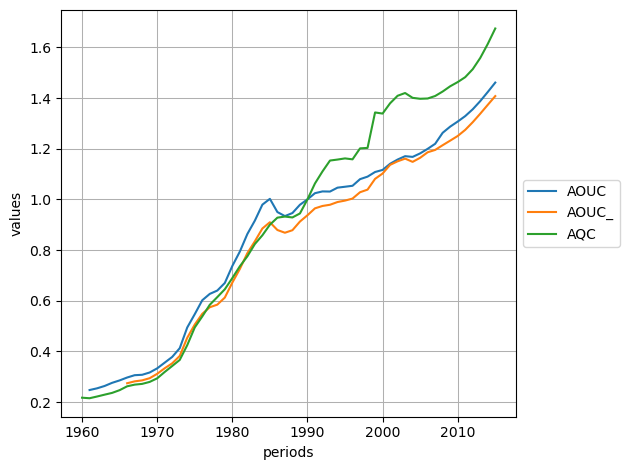

<Axes: xlabel='periods', ylabel='values'>

In [215]:
vars_subset = variables["AOUC;AOUC_;AQC"]
vars_subset.plot()

## Execute Identities

To execute an identity, use the [execute()](../_generated/iode.Identities.execute.rst#iode.Identities.execute) method of the [identities](../_generated/iode.Identities.rst#iode.Identities) workspace:

In [216]:
identities.load(f"{Sample_DATA_DIR}/fun.idt")
variables.load(f"{Sample_DATA_DIR}/fun.var")

print(identities["GAP_"])
print(identities["GAP2"])

# reset variables GAP_ and GAP2
variables["GAP_"] = 0.
variables["GAP2"] = 0.  
variables["GAP_;GAP2"] 


Loading C:\soft\miniconda3\Lib\site-packages\iode\tests\data/fun.idt
48 objects loaded
Loading C:\soft\miniconda3\Lib\site-packages\iode\tests\data/fun.var
394 objects loaded
100*((QAF_/Q_F)-1)
100*(QAFF_/(Q_F+Q_I))


Workspace: Variables
nb variables: 2
filename: c:\soft\miniconda3\Lib\site-packages\iode\tests\data\fun.var
description: Modèle fun - Simulation 1                         
sample: 1960Y1:2015Y1
mode: LEVEL

name	1960Y1	1961Y1	1962Y1	1963Y1	1964Y1	1965Y1	...	2009Y1	2010Y1	2011Y1	2012Y1	2013Y1	2014Y1	2015Y1
GAP2	  0.00	  0.00	  0.00	  0.00	  0.00	  0.00	...	  0.00	  0.00	  0.00	  0.00	  0.00	  0.00	  0.00
GAP_	  0.00	  0.00	  0.00	  0.00	  0.00	  0.00	...	  0.00	  0.00	  0.00	  0.00	  0.00	  0.00	  0.00

In [217]:
# compute GAP_ and GAP2 (assuming Scalars and Variables are already loaded)
identities.execute("GAP_;GAP2")
variables["GAP_;GAP2"] 

Workspace: Variables
nb variables: 2
filename: c:\soft\miniconda3\Lib\site-packages\iode\tests\data\fun.var
description: Modèle fun - Simulation 1                         
sample: 1960Y1:2015Y1
mode: LEVEL

name	1960Y1	1961Y1	1962Y1	1963Y1	1964Y1	1965Y1	...	2009Y1	2010Y1	2011Y1	2012Y1	2013Y1	2014Y1	2015Y1
GAP2	 96.93	 97.40	 98.37	 97.71	100.88	100.63	...	100.85	100.54	101.36	102.19	102.50	102.15	101.59
GAP_	 -3.20	 -3.98	 -2.12	 -2.65	 -0.23	 -0.65	...	  1.96	  1.61	  2.61	  3.61	  4.06	  3.78	  3.24

In [218]:
# compute GAP_ and GAP2 over a subset of the sample
variables["GAP_"] = 0.
variables["GAP2"] = 0.
identities.execute("GAP_;GAP2", "2000Y1", "2005Y1")
variables["GAP_;GAP2", "1998Y1:2007Y1"] 

Workspace: Variables
nb variables: 2
filename: c:\soft\miniconda3\Lib\site-packages\iode\tests\data\fun.var
description: Modèle fun - Simulation 1                         
sample: 1998Y1:2007Y1
mode: LEVEL

name	1998Y1	1999Y1	2000Y1	2001Y1	2002Y1	2003Y1	2004Y1	2005Y1	2006Y1	2007Y1
GAP2	  0.00	  0.00	104.61	103.06	102.17	102.82	104.47	104.36	  0.00	  0.00
GAP_	  0.00	  0.00	  4.51	  3.31	  2.62	  3.46	  5.48	  5.58	  0.00	  0.00

## Arithmetic Operations On Variables

In [219]:
# reload variables to start from a clean state
variables.load(f"{Sample_DATA_DIR}/fun.var")

# select a subset of variables for the examples below
vars_subset = variables["A*", "1991Y1:1995Y1"]
vars_subset

Loading C:\soft\miniconda3\Lib\site-packages\iode\tests\data/fun.var
394 objects loaded


Workspace: Variables
nb variables: 5
filename: c:\soft\miniconda3\Lib\site-packages\iode\tests\data\fun.var
description: Modèle fun - Simulation 1                         
sample: 1991Y1:1995Y1
mode: LEVEL

 name	1991Y1	1992Y1	1993Y1	1994Y1	1995Y1
ACAF 	 26.24	 30.16	 34.66	  8.16	-13.13
ACAG 	-30.93	-40.29	-43.16	-16.03	-41.85
AOUC 	  1.02	  1.03	  1.03	  1.05	  1.05
AOUC_	  0.96	  0.97	  0.98	  0.99	  1.00
AQC  	  1.06	  1.11	  1.15	  1.16	  1.16

### With a float

In [220]:
# add a scalar to all values of a subset of variables
new_vars_subset = vars_subset + 2.0
new_vars_subset

Workspace: Variables
nb variables: 5
filename: c:\soft\miniconda3\Lib\site-packages\iode\tests\data\fun.var
description: Modèle fun - Simulation 1                         
sample: 1991Y1:1995Y1
mode: LEVEL

 name	1991Y1	1992Y1	1993Y1	1994Y1	1995Y1
ACAF 	 28.24	 32.16	 36.66	 10.16	-11.13
ACAG 	-28.93	-38.29	-41.16	-14.03	-39.85
AOUC 	  3.02	  3.03	  3.03	  3.05	  3.05
AOUC_	  2.96	  2.97	  2.98	  2.99	  3.00
AQC  	  3.06	  3.11	  3.15	  3.16	  3.16

### Between (Subsets Of) Variables Objects

In [221]:
# add two subsets of variables
new_vars_subset = vars_subset + vars_subset
new_vars_subset

Workspace: Variables
nb variables: 5
filename: c:\soft\miniconda3\Lib\site-packages\iode\tests\data\fun.var
description: Modèle fun - Simulation 1                         
sample: 1991Y1:1995Y1
mode: LEVEL

 name	1991Y1	1992Y1	1993Y1	1994Y1	1995Y1
ACAF 	 52.48	 60.32	 69.32	 16.32	-26.26
ACAG 	-61.87	-80.57	-86.32	-32.06	-83.69
AOUC 	  2.05	  2.06	  2.06	  2.09	  2.10
AOUC_	  1.93	  1.95	  1.96	  1.98	  1.99
AQC  	  2.13	  2.22	  2.31	  2.31	  2.32

### With pandas Series or DataFrame

See the `Arithmetic Operations On Variables With pandas Series And DataFrames` section from the [IODE and pandas](pandas.ipynb) tutorial for more details.

### With larray Arrays

See the `Arithmetic Operations On Variables With larray Array objects` section from the [IODE and larray](larray.ipynb) tutorial for more details.

### With numpy ndarrays

See the `Arithmetic Operations On Variables With numpy ndarray objects` section from the [IODE and numpy](numpy.ipynb) tutorial for more details.

## Estimation

To estimate either one equation or a block of equations, use the [estimate](../_generated/iode.Equation.estimate.rst#iode.Equation.estimate) method of the [Equation](../_generated/iode.Equation.rst#iode.Equation) class or the [estimate](../_generated/iode.Equations.estimate.rst#iode.Equations.estimate) method of the [Equations](../_generated/iode.Equations.rst#iode.Equations) workspace:

Calling the `estimate(from_period, to_period, list_eqs, quiet)` method estimates an equation or a block of equations in the specified periods range.

At the end of the estimation process, certain variables and scalars are automatically created 
if the process has converged. These variables and scalars can be used for computational purposes and, 
as they are part of the global workspace, can be saved for future use.

The tests resulting from the last estimation are saved as scalars. The same applies to residuals, 
left-hand and right-hand members of equations.

Saved tests (as scalars) have the following names (`e<ith>_*` for the <ith> equation of the block):

  * `e<ith>_n`  : number of sample periods 
  * `e<ith>_k`  : number of estimated coefficients 
  * `e<ith>_stdev` : std dev of residuals 
  * `e<ith>_meany` : mean of Y 
  * `e<ith>_ssres` : sum of squares of residuals 
  * `e<ith>_stderr` : std error 
  * `e<ith>_stderrp` : std error percent (in %) 
  * `e<ith>_fstat` : F-Stat 
  * `e<ith>_r2`  : R square 
  * `e<ith>_r2adj`  : adjusted R-squared 
  * `e<ith>_dw` : Durbin-Watson 
  * `e<ith>_loglik`  : Log Likelihood 

Calculated series are saved in special variables:

  * `_YCALC<i>` : right-hand side of the <ith> equation in the block
  * `_YOBS<i>` : left-hand side of the <ith> equation in the block 
  * `_YRES<i>` : residuals of the <ith> equation of the block 

Outside the estimation sample, the series values are `NA`.

Let's start by reloading all workspaces:

In [222]:
comments.load(f"{Sample_DATA_DIR}/fun.cmt")
equations.load(f"{Sample_DATA_DIR}/fun.eqs")
identities.load(f"{Sample_DATA_DIR}/fun.idt")
lists.load(f"{Sample_DATA_DIR}/fun.lst")
scalars.load(f"{Sample_DATA_DIR}/fun.scl")
tables.load(f"{Sample_DATA_DIR}/fun.tbl")
variables.load(f"{Sample_DATA_DIR}/fun.var")

Loading C:\soft\miniconda3\Lib\site-packages\iode\tests\data/fun.cmt
317 objects loaded
Loading C:\soft\miniconda3\Lib\site-packages\iode\tests\data/fun.eqs
274 objects loaded
Loading C:\soft\miniconda3\Lib\site-packages\iode\tests\data/fun.idt
48 objects loaded
Loading C:\soft\miniconda3\Lib\site-packages\iode\tests\data/fun.lst
17 objects loaded
Loading C:\soft\miniconda3\Lib\site-packages\iode\tests\data/fun.scl
161 objects loaded
Loading C:\soft\miniconda3\Lib\site-packages\iode\tests\data/fun.tbl
46 objects loaded
Loading C:\soft\miniconda3\Lib\site-packages\iode\tests\data/fun.var
394 objects loaded


Example for one equation:

In [223]:
# ---- estimate coefficients of one equation ----
print(f"ACAF equation LEC: {equations['ACAF'].lec}")
print(f"ACAF equations coefficients (= scalars): {equations['ACAF'].coefficients}")
print(f"ACAF equations variables: {equations['ACAF'].variables}")

# copy the original values of the coefficients into an isolated scalars workspace
# Useful to restore the original values if the estimation process didn't go well
scalars_copy = scalars[equations['ACAF'].coefficients].copy()
print(f"scalars names in scalars_copy: {scalars_copy.names}")

# reset scalars
for name in equations['ACAF'].coefficients:
    scalars[name] = 0., 1.

# estimate the 'ACAF' equation for the periods ranging from '1980Y1' to '1996Y1'
success = equations.estimate("1980Y1", "1996Y1", "ACAF")
# or equivalently
success = equations["ACAF"].estimate("1980Y1", "1996Y1")
print(f"Equation estimation success: {success}")

print(f"Resulting values for the coefficient 'acaf1': {scalars['acaf1']}")
print(f"Resulting values for the coefficient 'acaf2': {scalars['acaf2']}")
print(f"Resulting values for the coefficient 'acaf4': {scalars['acaf4']}")

ACAF equation LEC: (ACAF/VAF[-1]) :=acaf1+acaf2*GOSF[-1]+
acaf4*(TIME=1995)
ACAF equations coefficients (= scalars): ['acaf1', 'acaf2', 'acaf4']
ACAF equations variables: ['ACAF', 'VAF', 'GOSF', 'TIME']
scalars names in scalars_copy: ['acaf1', 'acaf2', 'acaf4']
Estimating : iteration 1 (||eps|| = 0.173205)

Estimating : iteration 2 (||eps|| = 5.16075e-09)

Solution reached after 2 iteration(s). Creating results file ...

Estimating : iteration 1 (||eps|| = 7.05003e-13)

Solution reached after 1 iteration(s). Creating results file ...

Equation estimation success: True
Resulting values for the coefficient 'acaf1': Scalar(0.0157705, 1, 0.00136949)
Resulting values for the coefficient 'acaf2': Scalar(-7.96505e-06, 1, 1.48247e-06)
Resulting values for the coefficient 'acaf4': Scalar(-0.0085027, 1, 0.00208257)


Example for a block of equations:

In [224]:
# ---- estimate a block of equations ----
print(f"ACAF equation LEC: {equations['ACAF'].lec}")
print(f"ACAF equations coefficients (= scalars): {equations['ACAF'].coefficients}")
print(f"ACAF equations variables: {equations['ACAF'].variables}")
print(f"DPUH equation LEC: {equations['DPUH'].lec}")
print(f"DPUH equations coefficients (= scalars): {equations['DPUH'].coefficients}")
print(f"DPUH equations variables: {equations['DPUH'].variables}")

# copy the original values of the coefficients into an isolated scalars workspace
# Useful to restore the original values if the estimation process didn't go well
scalars_names = equations['ACAF'].coefficients + equations['DPUH'].coefficients
scalars_names = list(set(scalars_names))   # removed duplicates
scalars_copy = scalars[scalars_names].copy()
print(f"scalars names in scalars_copy: {scalars_copy.names}")

# reset scalars
for name in equations['ACAF'].coefficients:
    scalars[name] = 0., 1.
for name in equations['DPUH'].coefficients:
    scalars[name] = 0., 1.

# prepare equations (same block and method)
block = "ACAF;DPUH"
for name in block.split(";"):
    equations[name] = {"block": block, "method": "LSQ"}

# estimation the block 'ACAF;DPUH' for the periods ranging from '1980Y1' to '1996Y1'
success = equations.estimate("1980Y1", "1996Y1", block)
print(f"Block estimation success: {success}")

print(f"Resulting values for the coefficient 'acaf1': {scalars['acaf1']}")
print(f"Resulting values for the coefficient 'acaf2': {scalars['acaf2']}")
print(f"Resulting values for the coefficient 'acaf4': {scalars['acaf4']}")
print(f"Resulting values for the coefficient 'dpuh_1': {scalars['dpuh_1']}")
print(f"Resulting values for the coefficient 'dpuh_2': {scalars['dpuh_2']}")

ACAF equation LEC: (ACAF/VAF[-1]) :=acaf1+acaf2*GOSF[-1]+
acaf4*(TIME=1995)
ACAF equations coefficients (= scalars): ['acaf1', 'acaf2', 'acaf4']
ACAF equations variables: ['ACAF', 'VAF', 'GOSF', 'TIME']
DPUH equation LEC: dln (DPUH/DPUHO):=dpuh_1+dpuh_2*dln(IHU/PI5)+dln PC
DPUH equations coefficients (= scalars): ['dpuh_1', 'dpuh_2']
DPUH equations variables: ['DPUH', 'DPUHO', 'IHU', 'PI5', 'PC']
scalars names in scalars_copy: ['acaf1', 'acaf2', 'acaf4', 'dpuh_1', 'dpuh_2']
Estimating : iteration 1 (||eps|| = 0.223607)

Estimating : iteration 2 (||eps|| = 5.16075e-09)

Solution reached after 2 iteration(s). Creating results file ...

Estimating : iteration 1 (||eps|| = 4.38565e-12)

Solution reached after 1 iteration(s). Creating results file ...

Block estimation success: True
Resulting values for the coefficient 'acaf1': Scalar(0.0157705, 1, 0.00136079)
Resulting values for the coefficient 'acaf2': Scalar(-7.96505e-06, 1, 1.47188e-06)
Resulting values for the coefficient 'acaf4': Sca

## Simulation

To simulate a model, you must create and initialize an instance of the [Simulation](../_generated/iode.Simulation.rst#iode.Simulation) class.

### Models

IN IODE, a model is simply a list of equations. No other construction is necessary: in this way, to modify a model, the only thing to do is to modify the list that defines it. For example, if a model is logically divided into 5 blocks, 5 lists of equations will be defined:

```
BLOC1 : A, B, C, D
BLOC2 : X, Y
BLOC3 : C1, C2, C3, C4
BLOC4 : X_A1, X_A2, X_A3
BLOC5 : R1, R2, R3, S_12
MODSIM : $BLOC1, $BLOC2, $BLOC3, $BLOC4, $BLOC5
```

To simulate a model, all equations of the model must have been loaded or created. In addition, all the variables and scalars used in the model equations must have been loaded or created. Values of exogenous variables and of scalar cannot be `NA` (*Not Available*) over the simulation periods.
   
### Exchange Endo-Exo

It is possible to set endogenous-exogenous pairs for `goal seeking`. For each pair, the status of the variables is exchanged: endogenous becomes exogenous and vice versa. This enables the model to be run through known endogenous values and to deduce the necessary values for the associated exogenous variables. The exogenous variables take on the value calculated over the entire workspace period.
See the documentation of the [model_exchange](../_generated/iode.Simulation.model_exchange.rst#iode.Simulation.model_exchange) method.

### Newton-Raphson Algorithm

When an equation is not explicitly defined in terms of its endogen, or when the endogen appears several times in the equation, the simulation algorithm tries to solve the equation using a Newton method. If this method fails, a secant method is used to find a solution to the equation. However, there is no guarantee that a solution will be found in every case. Non-continuous functions (singularities) such as:
   
$$
X = a + \frac{b}{X + 1}
$$
   
may be impossible to solve around their singular point. For this type of problem, the only solution is to modify the form of the equation:
   
$$
(X - a) * (X + 1) = b
$$
 
<div class="alert alert-warning">
<strong>Warning:</strong>

a) As the endogenous variable of an equation carries the name of the equation, it is not possible to place in a model two equations with the same endogenous variable.
  
b) The order in which equations are introduced in the lists can influence the behavior of the simulation algorithm. As this is a Gauss-Seidel algorithm, the information calculated is used directly in the rest of the calculation. If *X* depends on *Y*, it's better to place *Y* before *X* in the list of equations.
</div>


### Examples

In [225]:
from iode import SimulationSort

print(f"possible sort algorithms: {[member.name for member in SimulationSort]}")

possible sort algorithms: ['CONNEX', 'BOTH', 'NONE']


In [226]:
from iode import SimulationInitialization

print(f"possible initialization methods: {[member.name for member in SimulationInitialization]}")

possible initialization methods: ['TM1', 'TM1_A', 'EXTRA', 'EXTRA_A', 'ASIS', 'TM1_NA', 'EXTRA_NA']


In [227]:
from iode import Simulation

# create and initialize a Simulation instance
simu = Simulation(sort_algorithm=SimulationSort.BOTH, initialization_method=SimulationInitialization.TM1)
print(simu)

--- Simulation ---
convergence_threshold = 0.001
relax = 1.0
max_nb_iterations = 100
sort_algorithm = BOTH (Connex compon. + Triangulation)
initialization_method = TM1 (Y := Y[-1], if Y null or NA)
debug = False
nb_passes = 5
debug_newton = False
------------------


To run the simulation, call the [Simulation.model_simulate](../_generated/iode.Simulation.model_simulate.rst#iode.Simulation.model_simulate) method:

In [228]:
print(f"exogenous variable 'UY': {equations['UY'].lec}")
print(f"endogenous variable 'XNATY': {identities['XNATY']}")
# reset values of exogenous variable
variables["UY", "2000Y1:2015Y1"] = 0.0

print(f"exogenous variable 'UY' before simulation:\n{variables['UY', '1998Y1:2005Y1']}")

# run the simulation for the periods range '2000Y1' to '2015Y1'
success = simu.model_simulate("2000Y1", "2015Y1", quiet=True)
print(f"Simulation success: {success}")

print(f"exogenous variable 'UY' after simulation:\n{variables['UY', '1998Y1:2005Y1']}")

exogenous variable 'UY': UY := NATY-NDOMY-NIY-NGY-(EFXY-EFMY)-NFY
endogenous variable 'XNATY': grt NATY
exogenous variable 'UY' before simulation:
Workspace: Variables
nb variables: 1
filename: c:\soft\miniconda3\Lib\site-packages\iode\tests\data\fun.var
description: Modèle fun - Simulation 1                         
sample: 1998Y1:2005Y1
mode: LEVEL

name	1998Y1	1999Y1	2000Y1	2001Y1	2002Y1	2003Y1	2004Y1	2005Y1
UY  	671.46	647.39	  0.00	  0.00	  0.00	  0.00	  0.00	  0.00

Simulation success: True
exogenous variable 'UY' after simulation:
Workspace: Variables
nb variables: 1
filename: c:\soft\miniconda3\Lib\site-packages\iode\tests\data\fun.var
description: Modèle fun - Simulation 1                         
sample: 1998Y1:2005Y1
mode: LEVEL

name	1998Y1	1999Y1	2000Y1	2001Y1	2002Y1	2003Y1	2004Y1	2005Y1
UY  	671.46	647.39	624.18	645.05	661.61	676.56	680.90	682.99



## Import/Export IODE workspaces from/to pandas Series and DataFrame

To import / export the content of the `comments`, `identities` and `lists` workspaces from/to a pandas Series object, use the [from_series()](../_generated/iode.Comments.from_series.rst#iode.Comments.from_series) and [to_series()](../_generated/iode.Comments.to_series.rst#iode.Comments.to_series) methods. 

Alternatively, you can use the [series](../_generated/iode.Comments.series.rst#iode.Comments.series) property to export the content of the `comments`, `identities` and `lists` workspaces to a pandas Series object.

For the examples, see the [pandas tutorial](pandas.ipynb).

## Import/Export IODE Variables workspace from/to numpy ndarray

To import / export the content of the `Variables` workspace (or a subset of it) from/to a numpy ndarray object, use the [from_numpy](../_generated/iode.Variables.from_numpy.rst#iode.Variables.from_numpy) and [to_numpy](../_generated/iode.Variables.to_numpy.rst#iode.Variables.to_numpy) methods.

For the examples, see the [numpy tutorial](numpy.ipynb).

## Import/Export the Variables workspace from/to LArray Array

To import / export the content of the `variables` workspaces from/to an LArray Array object, use the [from_array()](../_generated/iode.Variables.from_array.rst#iode.Variables.from_array) and [to_array()](../_generated/iode.Variables.to_array.rst#iode.Variables.to_array) methods.

For the examples, see the [larray tutorial](larray.ipynb).

## Execute IODE report commands/files

To run an IODE command, use the [execute_command()](../_generated/iode.execute_command.rst#iode.execute_command) function:

In [229]:
from iode import execute_command

# ---- execute IODE commands ----
print("Execute IODE commands (useful for IODE functions and commands not yet ported to Python):")
execute_command("$WsClearVar")
execute_command("$WsSample 2000Y1 2005Y1")
execute_command("$DataCalcVar A t+1")
execute_command("$DataCalcVar B t-1")
execute_command("$DataCalcVar C A/B")
execute_command("$DataCalcVar D grt A")
execute_command("$WsSaveVar test_var.av")
with open("test_var.av", "r") as f:
    print(f.read())

Execute IODE commands (useful for IODE functions and commands not yet ported to Python):
Saving test_var.av
sample 2000Y1 2005Y1
A 1 2 3 4 5 6 
B -1 0 1 2 3 4 
C -1 na 3 2 1.66666666666667 1.5 
D na 100 50 33.3333333333333 25 20 



To run an entire IODE report (i.e. file with the '.rep' extension), call the [execute_report()](../_generated/iode.execute_report.rst#iode.execute_report) function:

In [230]:
from iode import execute_report

# ---- execute IODE reports ----
print("Execute an IODE report -> execute_report()")
with open("create_var.rep", "w") as f:
    f.write("$WsClearVar\n")
    f.write("$WsSample 2000Y1 2005Y1\n")
    f.write("$DataCalcVar %1% t+1 \n")
    f.write("$DataCalcVar %2% t-1 \n")
    f.write("$DataCalcVar %3% %1%/%2%\n")
    f.write("$DataCalcVar %4% grt %1% \n")
    f.write("$WsSaveVar test_var.av\n")

execute_report("create_var.rep", ["A", "B", "C", "D"])

with open("test_var.av", "r") as f:
    print(f.read())


Execute an IODE report -> execute_report()
Saving test_var.av
sample 2000Y1 2005Y1
A 1 2 3 4 5 6 
B -1 0 1 2 3 4 
C -1 na 3 2 1.66666666666667 1.5 
D na 100 50 33.3333333333333 25 20 



## Graphical User Interface

It is possible to run the graphical user interface to view the content of the IODE workspace from any line of a Python script. Simply call the function [view_workspace()](../_generated/iode.view_workspace.rst#iode.view_workspace) to open the GUI.

Content of a Python script:

```python
from iode import view_workspace, ...

... code here ...

# To view the workspace, you can use the following command:
view_workspace()

# To open the graphical user interface showing the files 
# from a specific directory, pass the path to the directory 
# as an argument:
view_workspace("path/to/your/directory")

... code here ...
```